# Airline Flights. Price Prediction ✈ :


Contains data about airplane flights, including departure city, arrival city, airline, class (economy/business), and price

*   instances: 300,153
*   attributes: 11

Dataset: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


## Research Objective
The primary objective of this research is to leverage supervised machine learning techniques such as Linear Regression, Decision Trees, Random Forest Regressor, etc., to build a robust and accurate model for price prediction, by analyzing historical flight data. More precisely, we are determined to answer the following questions:


*  Which features have the most significant impact on ticket prices?

*  What is the the best machine learning model for predicting ticket prices based on the given features?





## Significance of the study
Understanding and predicting airline flight prices has significant implications for both, customers and airline industries.

An accurate price prediction model can aid customers in identifying the best time for ticket purchase, potentially saving their money and improving their travel and planning experience, which simultaneously results in an increased customer satisfaction and loyalty.

Conversely, airline companies can utilize the model to refine their pricing strategies, guaranteeing competitive yet profitable pricing, enhancing their revenue control, and boosting operational effectiveness.

## Features
1) `Airline`: The name of the airline company is stored in the airline column; a categorical feature having 6 different airlines.

2) `Flight`: Flight stores information regarding the plane's flight code; a categorical feature.

3) `Source City`: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) `Departure Time`: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the
departure time and have 6 unique time labels.

5) `Stops`: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) `Arrival Time`: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) `Destination City`: City where the flight will land. It is a categorical feature having 6 unique cities.

8) `Class`: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) `Duration`: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) `Days Left`: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.


`Price`: Target variable stores information about the ticket price.

##  Loading and exploring the data


### Importing all the required libraries:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import LearningCurveDisplay
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope
import time
from scipy.stats import randint

In [7]:
plt.style.use('ggplot')    # set the plotting style for Matplotlib to make plots more visually appealing and easier to read

In [8]:
df = pd.read_csv('Clean_Dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Separating train and test data


In [9]:
X = df.drop(columns=['price']).copy()
y = df['price'].copy()

X.shape, y.shape

((300153, 10), (300153,))

In [10]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_full.shape, y_train_full.shape, X_test_full.shape, y_test_full.shape


((240122, 10), (240122,), (60031, 10), (60031,))

By now, let's restrict our data to 50000 instances for the sake of computational time:

In [11]:
X, _, y, _ = train_test_split(X, y, train_size=50000, random_state=42)

X.shape, y.shape

((50000, 10), (50000,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = pd.concat([X_train_full, y_train_full], axis=1)

In [13]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
148417,Air_India,AI-424,Kolkata,Afternoon,one,Morning,Chennai,Economy,19.42,6,13524
36879,Indigo,6E-2193,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,7.00,13,9940
274531,Air_India,AI-768,Kolkata,Afternoon,one,Afternoon,Chennai,Business,21.17,44,55983
166397,Vistara,UK-876,Hyderabad,Night,one,Early_Morning,Bangalore,Economy,10.25,11,7927
272722,Vistara,UK-774,Kolkata,Night,one,Night,Chennai,Business,26.50,5,55502


Here we display the first 5 rows (by deafult) of our dataset to get the rough idea of the features and how our data looks in general.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 148417 to 121958
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240122 non-null  object 
 1   flight            240122 non-null  object 
 2   source_city       240122 non-null  object 
 3   departure_time    240122 non-null  object 
 4   stops             240122 non-null  object 
 5   arrival_time      240122 non-null  object 
 6   destination_city  240122 non-null  object 
 7   class             240122 non-null  object 
 8   duration          240122 non-null  float64
 9   days_left         240122 non-null  int64  
 10  price             240122 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 22.0+ MB


We can see that eight columns are of type object, which typically means they contain string data.
Other three columns contain numerical data. In general, all columns have the same number of non-null entries, indicating there are no missing values in any column.

In [15]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Using .isna().sum() we validate further that our data does not contain any NaN/missing data points, so we do not need to process it in that direction.

In [16]:
df.rename(columns={'class': 'flight_class'}, inplace=True)

One of our features is named class, namely Business or Economic class tickets, but since 'class' is a Python reserved word, we must rename the respective column as flight_class.

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'{column}: {df[column].unique()}')

airline: ['Air_India' 'Indigo' 'Vistara' 'GO_FIRST' 'SpiceJet' 'AirAsia']
flight: ['AI-424' '6E-2193' 'AI-768' ... '6E-911' 'G8-107' 'I5-737']
source_city: ['Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Mumbai' 'Bangalore']
departure_time: ['Afternoon' 'Night' 'Morning' 'Early_Morning' 'Evening' 'Late_Night']
stops: ['one' 'two_or_more' 'zero']
arrival_time: ['Morning' 'Night' 'Afternoon' 'Early_Morning' 'Evening' 'Late_Night']
destination_city: ['Chennai' 'Bangalore' 'Delhi' 'Kolkata' 'Mumbai' 'Hyderabad']
flight_class: ['Economy' 'Business']


We print out the names and unique values of all columns in the DataFrame df that have a data type of object. This help us to understand the distinct categories or strings present in these columns.

In [18]:
df['stops'].value_counts()

one            200570
zero            28887
two_or_more     10665
Name: stops, dtype: int64

Flights with one stop are the most popular and in demand among customers.

In [19]:
len(df['flight'].unique()) # number of unique values in 'flight'

1560

In [20]:
df['airline'].value_counts()

Vistara      102452
Air_India     64558
Indigo        34468
GO_FIRST      18556
AirAsia       12848
SpiceJet       7240
Name: airline, dtype: int64

Here, we are able to gain a deeper insight into the flights distribution among the six airline companies. We also see that Vistara offers the biggest amount of flights, with Air_India and Indigo being on the 2nd and 3rd place respectively.

Let's check if we have identical instances, which could potentially have a bad influence on a performance of the models:

In [21]:
df.loc[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price


We see that there are no completely identical rows.

In [22]:
df['price'].describe()

count    240122.000000
mean      20888.572417
std       22696.150093
min        1105.000000
25%        4783.000000
50%        7426.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

For our target variable, mean is significantly larger than median, so data is skewed to the right (majority of tickets are cheap, and there are some smaller amount are very expensive).

That tells us that we can potentially benefit from applying log transformation of a target variable

---



### Data Visualization

#### Popularity of airlines

Firslty, let us visualize how popular are our given airlines by demonstrating the price distribution for all six airline companies, as well as the amount of tickets that every company had to offer.

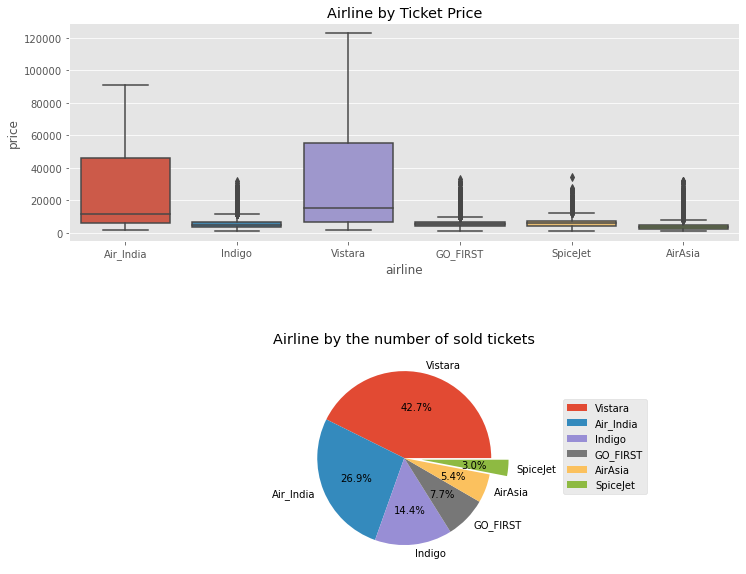

Airlines offering business class flights: ['Air_India' 'Vistara']


In [23]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

labels = df.airline.value_counts().index.tolist()

explode = (0, 0, 0, 0, 0, 0.2)

ax[1].pie(df.airline.value_counts(), labels=labels, explode=explode, autopct='%1.1f%%')
ax[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
ax[1].set_title('Airline by the number of sold tickets')
ax[0]. set_title('Airline by Ticket Price')
sns.boxplot(x='airline', y='price', data=df, ax=ax[0])

fig.subplots_adjust(hspace=0.5)

plt.show()


business_class_flights = df[df['flight_class'] == 'Business']

airlines_offering_business_class = business_class_flights['airline'].unique()

print("Airlines offering business class flights:", airlines_offering_business_class)


Given the figures above, we can conclude the following:
<br>
* Vistara and Air_India form appproximately 70% of the entire market, with Vistara oficially beinf the most popular airline in terms of ticket sales.
<br>
<br>
* Spicejet remains the least popular airline company with only 3% of the market share.
<br>
<br>
* Vistara and Air_India offer the highest ticket price range in comparison to other 4 companies.
<br>
<br>
* For Vistara and Air_India the median price is significantly higher than for other 4 airlines.
<br>
<br>
* For GO_FIRST, Indigo, SpiceJet, and AirAsia prices are tightly clustered at the lower end with median price being low. Short whiskers indicate the low variability in prices. All 4 companies have numerous high-priced outliers, which may be related to the last-minute bookings for example.
<br>
<br>
* It is also noticable that Vistara and Air_India do not have so many outliers in comparison to other four companies, which may be due to the fact that Vistara and Air_India are the only companies offering business class flights, so for them such price variability with significantly high prices is a common practice.
<br>
<br>
In summary, it appears that despite higher ticket prices, Vistara and Air_India are popular choices, possibly due to their service quality or other factors not shown in the data.


#### Price Boxplot

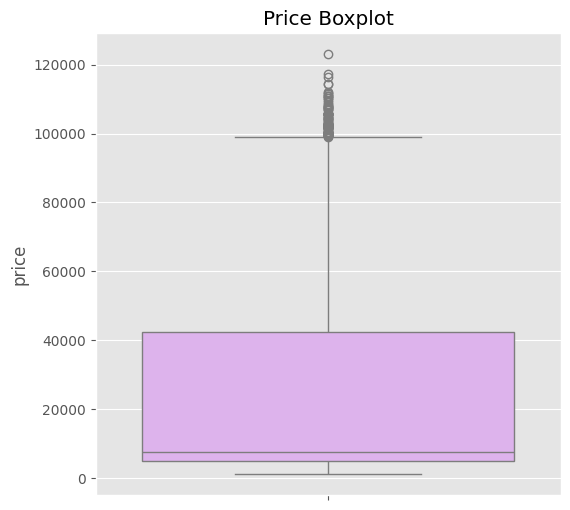

In [23]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='price', data=df, color='#e1a9f6')
plt.title('Price Boxplot')
plt.show()

Valuable insights:
* Ticket prices are mainly distributed ranging from the 5000 to 40000 rupees.
<br>
<br>
* Median ticket price is around 10000 rupees indicating that half of the tickets are priced below this amount.
<br>
<br>
* Ticket prices show considerable variability, as indicated by the wide interquartile range.
<br>
<br>
* There are several high-priced outliers, suggesting that while most ticket prices are below 100000, quite a few tickets are priced much higher, up to 120000 rupees.

#### Ticket Price Distribution

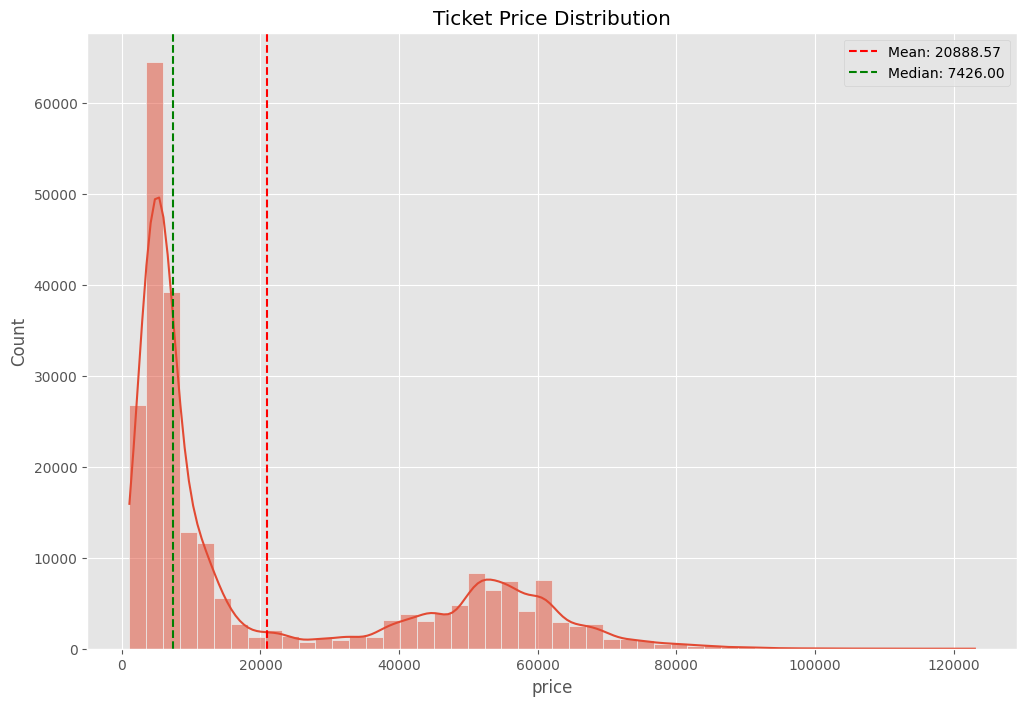

In [24]:
plt.figure(figsize=(12, 8))
sns.histplot(df['price'],
             bins=50,
             kde = True)
plt.axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: {df["price"].mean():.2f}')
plt.axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: {df["price"].median():.2f}')

# Add legend with specified labels and colors
plt.legend()

plt.title('Ticket Price Distribution')
plt.show()

The histogram above illustrates the distribution of ticket prices, providing the following valuable insights:

* The distribution is heavily right-skewed, with most prices clustered at the lower end and a long tail extending to higher prices. This suggests that while there are many affordable tickets, there are also tickets that are significantly more expensive.
<br>
<br>
* Median ticket price is lower than the mean ticket price (which is common in right-skewed distributions), suggesting that higher-priced tickets are pulling the mean upwards.
<br>
<br>
* The long tail to the right indicates the presence of outliers, which are tickets priced much higher than the rest. Even though these are pretty reasonable, i.e. Business Class, a few days left/last minute bookings, this will definitely impact our choice of models and metrics for measuring the performance.


####  Ticket price vs Duration of the flight


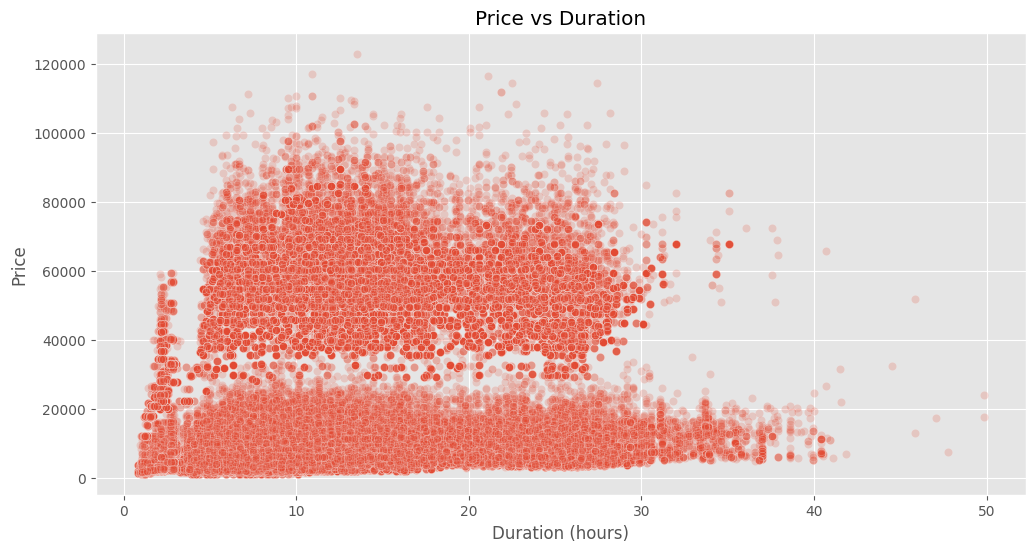

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration', y='price', data=df, alpha=0.2)
plt.title('Price vs Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()

In the scatter plot above each point represents the ticket, showing its price in relation to the flight duration. Moreover:

* Most flights have a duration between 0 and 25 hours, with a high density of points in this range.
<br>
<br>
* Prices vary widely, especially for the flights with shorter duration.
<br>
<br>
* Some points indicate very high prices for both short and long flights, suggesting Business class or last-minute tickets.
<br>
<br>
* We can also observe some kind of gap on the plot in between 25000 and 40000 rupees (approximately), which is most probably due to the difference in pricing in different classes, Business and Economy. We shall investigate it further to prove our claim (see below).

#### Flight Class Distribution

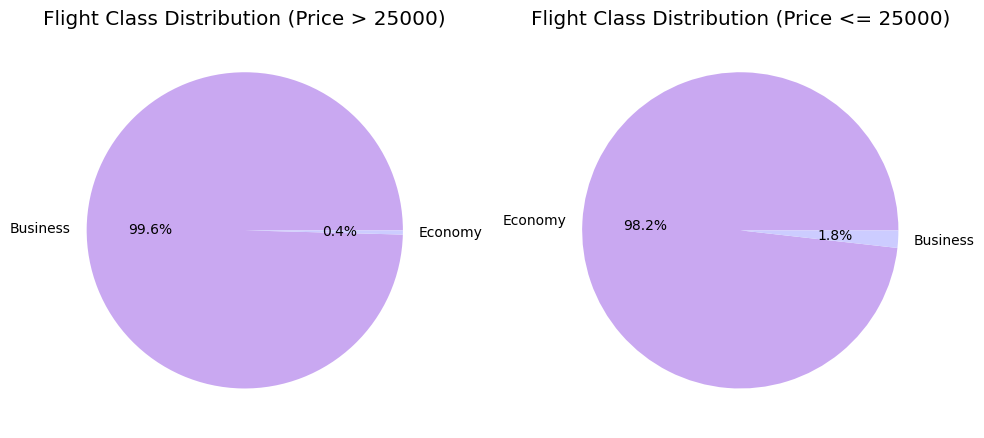

In [26]:
above_25000 = df[df['price'] > 25000]
below_25000 = df[df['price'] <= 25000]

# number of each flight class in each subset
above_25000_counts = above_25000['flight_class'].value_counts()
below_25000_counts = below_25000['flight_class'].value_counts()

# pie chart for above 25000 prices
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(above_25000_counts, labels=above_25000_counts.index, autopct='%1.1f%%', colors=['#c9a8f1', '#ccccff'])
plt.title('Flight Class Distribution (Price > 25000)')

# pie chart for below 25000 prices
plt.subplot(1, 2, 2)
plt.pie(below_25000_counts, labels=below_25000_counts.index, autopct='%1.1f%%', colors=['#c9a8f1', '#ccccff'])
plt.title('Flight Class Distribution (Price <= 25000)')

plt.tight_layout()
plt.show()

Indeed, the pie chart above demonstrates the correctness of our claim, that the low ticket density within the range between 25000 and 40000 rupees is most likely due to deliberate pricing strategy to create a clear distinction between Business and Economy class flights.
<br>
<br>
Also, the lower half of the tickets in the 'Price vs Duration' scatterplot, which falls into the category 'Price less than or equal to 25000', includes mostly Economy class tickets, with only 1.8% of Business class (probably some discounts).
<br>
<br>
At the same time, the tickets that cost more than 25000 mostly contain Business class flights, with only 0.4% of Economy tickets (probably due to last-minute bookings).

#### Ticket Price vs Flight Class

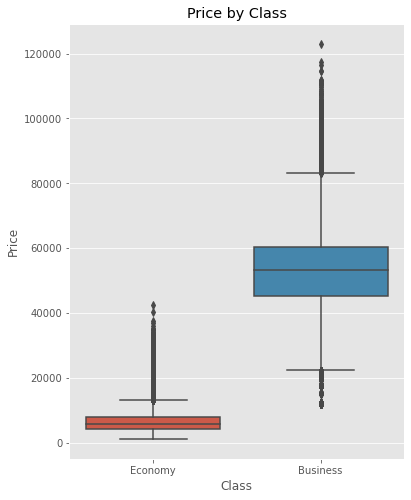

In [24]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='flight_class', y='price', data=df)
plt.title('Price by Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

Yet another illustration of how ticket prices are distributed among two different flight classes in our dataset:
<br>
<br>
* Business class tickets have higher and more varied price range compared to economy class tickets.
<br>
<br>
* The median price of business class is much higher than that of economy class, reflecting the generally higher cost of business class tickets.
<br>
<br>
* Business class shows more price variability (wider box and longer whiskers), while economy class prices are more clustered.
<br>
<br>
* Both classes have outliers, but business class has more extreme high-priced outliers compared to economy class.
<br>
<br>

#### Price by Days Left before Departure

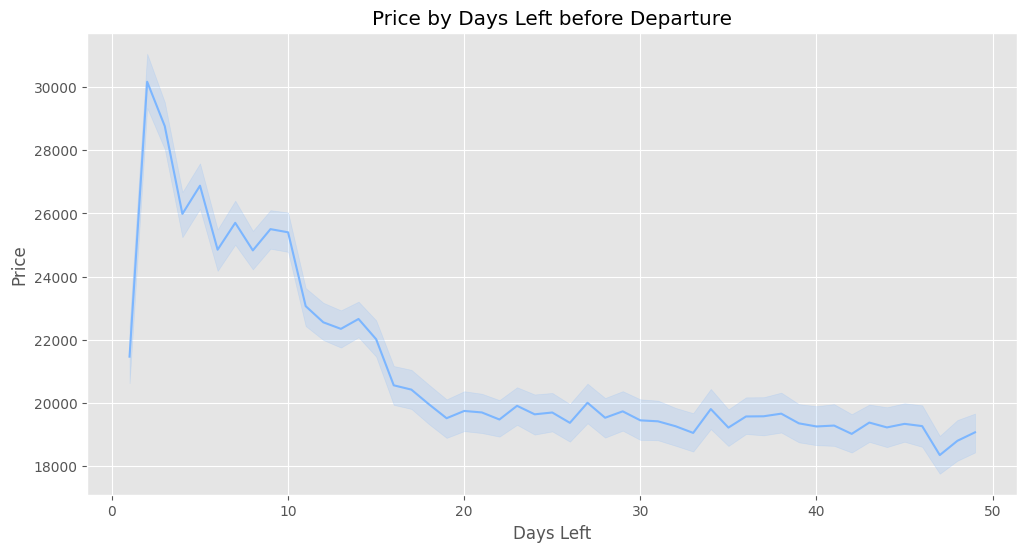

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='days_left', y='price', color='#7cb6ff')
plt.title('Price by Days Left before Departure')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

On the plot above we see how ticket prices are affected by the number of days left before departure. Just 2-3 days beforehand, prices jumps drastically, hitting 30000. While as the number of days left increases, ticket price keep decreasing, returning to regular. Noticeably, prices remain in the range 18000-20000 rupees with 20 days and more left before the departure.

Although, as the notice becomes shorter usually prices go up, we see strange dropdown in price one day before the departure. It could possibly be due to the fact that airlines want to ensure complete boarding.

#### Price by Source and Destination City

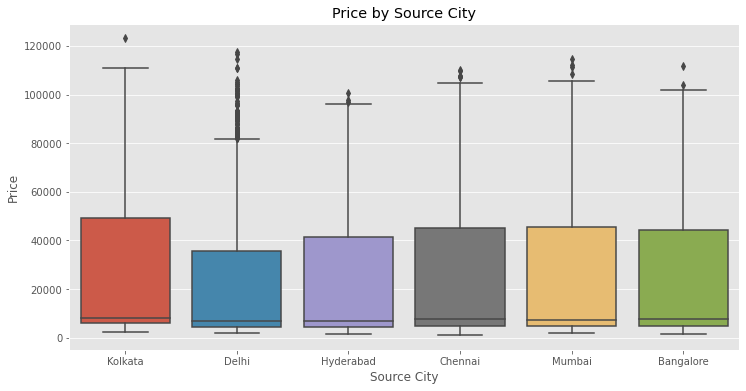

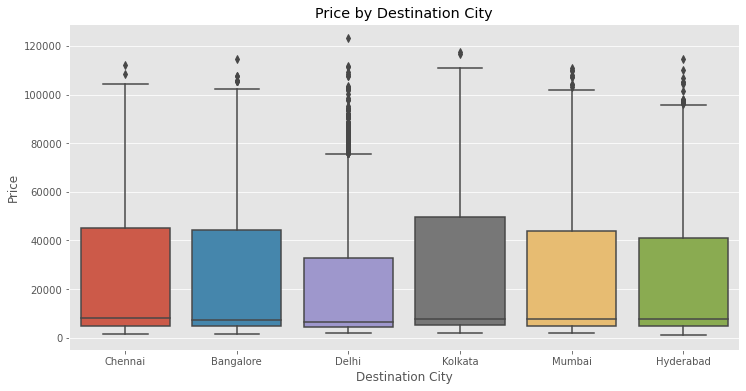

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Price by Source City')
plt.xlabel('Source City')
plt.ylabel('Price')

plt.figure(figsize=(12, 6))
sns.boxplot(x='destination_city', y='price', data=df)
plt.title('Price by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Price')
plt.show()

Key observations:
* Most cities, both as source and destination, have median prices in the range of 6000-8000.
<br>
<br>
* The interquartile ranges are quite similar across all cities, indicating a consistent spread  in the middle 50% of ticket prices. The overall price ranges from around 3000 to 50000 for most cities.
<br>
<br>
* Noticeably, Delhi stands out with a significant number of high-priced outliers both as source and destination city. So while most cities have a consistent range of ticket prices, Delhi experiences a higher number of expensive tickets. This is probably due to the fact that the majority of tickets for Delhi are sold cheaper in comparison to other cities, which makes the IQR for Delhi smaller. So higher ticket prices that for other cities are quite normal, are considered as outliers for Delhi.


#### Tickets Distribution by Arrival and Departure Time


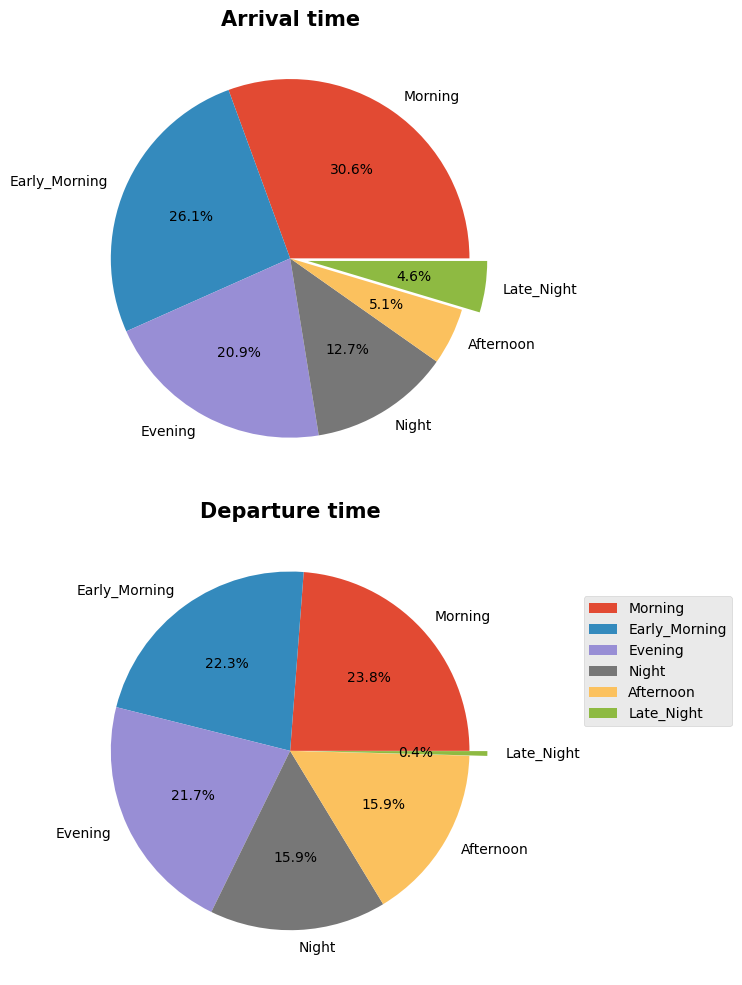

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.tight_layout()

# Top ax
labels = df.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.1)

ax[0].pie(df.arrival_time.value_counts(), labels=labels, explode=explode, autopct='%1.1f%%')
ax[0].set_title('Arrival time', fontsize=15, fontweight='bold')

ax[1].pie(df.departure_time.value_counts(), labels=labels, explode=explode, autopct='%1.1f%%')
ax[1].set_title('Departure time', fontsize=15, fontweight='bold')

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)
plt.show()

Pie charts above provide a breakdown of airline ticket timings and so we share the key observations:
* Both departure and arrival times see the highest activity in the morning, with arrival slightly higher than departures.
<br>
<br>
* There is also a significant number of flight both arriving and departing during the early morning, indicating a busy period for airlines.
<br>
<br>
* The evening period is also quite active for both arrivals and departures, though slightly less than the morning.
<br>
<br>
* Both night and afternoon periods see moderate/low activity compared to other times.
<br>
<br>
* Very few flights are scheduled to depart late at night, while a small number arrive during this period.
<br>
<br>
To sum up, charts suggest that airline operations are busiest in the morning and early morning, with a significant drop in activity during the late night period.

#### Departure and Arrival Time vs Ticket Price

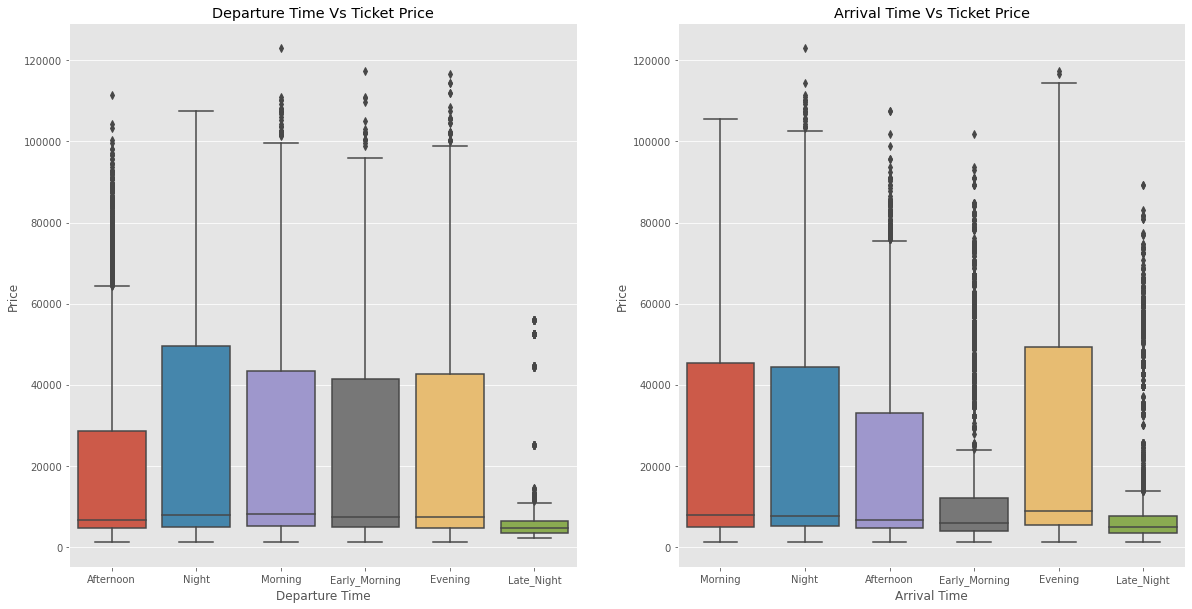

In [26]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)

sns.boxplot(data=df, x='departure_time', y='price')

plt.title('Departure Time Vs Ticket Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')

plt.subplot(1,2,2)

sns.boxplot(data=df, x='arrival_time',y='price')
plt.title('Arrival Time Vs Ticket Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.show()

Key observations:
* Morning and Night flights are generally more expensive.
<br>
<br>
* Flights departing and arriving in the Late_Night tend to have significantly lower ticket prices in comparison to other times of the day.
<br>
<br>

* The variablity in ticket prices is quite high for Morning, Night, Evening, and Afternoon.
<br>
<br>
* Early_Morning anf Late_Night departures, as well as departures in Afternoon, have a significant number of outliers.

In short, there is a clear trend where flights departing and arriving in less convenient hours tend to be cheaper, likely due to lower demand. Conversely, flights during more popular times (Morning, Night, Evening) are more expensive, reflecing higher demand.

Nevertheles, we want to investigate this drastically lower ticket price distribution for Late_Night departures and arrivals, as well as Early_Morning arrivals further. So let us give some more profound reasoning for such behaviour (see below).

#### Class Distribution by Departure and Arrival Times


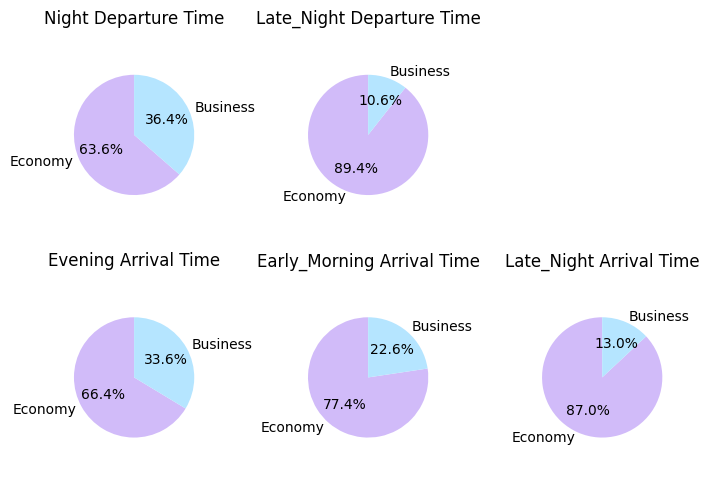

In [32]:
# Filter data for each condition
night_dep_data = df[df['departure_time'] == 'Night']
late_night_dep_data = df[df['departure_time'] == 'Late_Night']
late_night_arr_data = df[df['arrival_time'] == 'Late_Night']
evening_arr_data = df[df['arrival_time'] == 'Evening']
early_morning_arr_data = df[df['arrival_time'] == 'Early_Morning']

# Calculate proportions of flight classes for each condition
night_dep_class_counts = night_dep_data['flight_class'].value_counts(normalize=True)
late_night_dep_class_counts = late_night_dep_data['flight_class'].value_counts(normalize=True)
late_night_arr_class_counts = late_night_arr_data['flight_class'].value_counts(normalize=True)
evening_arr_class_counts = evening_arr_data['flight_class'].value_counts(normalize=True)
early_morning_arr_class_counts = early_morning_arr_data['flight_class'].value_counts(normalize=True)

# Create a figure with four subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 3, figsize=(7, 5))

# Define colors for the pie charts
colors = ['#d1bbf9', '#b5e5ff']

# Plot for Late_Night departure time
axs[0, 0].pie(night_dep_class_counts, labels=['Economy', 'Business'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 0].set_title('Night Departure Time', fontsize=12)
axs[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for Night departure time
axs[0, 1].pie(late_night_dep_class_counts, labels=['Economy', 'Business'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 1].set_title('Late_Night Departure Time', fontsize=12)
axs[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for Late_Night arrival time
axs[1, 2].pie(late_night_arr_class_counts, labels=['Economy', 'Business'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 2].set_title('Late_Night Arrival Time', fontsize=12)
axs[1, 2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for Early_Morning arrival time
axs[1, 1].pie(early_morning_arr_class_counts, labels=['Economy', 'Business'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 1].set_title('Early_Morning Arrival Time', fontsize=12)
axs[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for Evening arrival time
axs[1, 0].pie(evening_arr_class_counts, labels=['Economy', 'Business'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 0].set_title('Evening Arrival Time', fontsize=12)
axs[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Hide the unused subplots
axs[0, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The pie charts above display the distribution of ticket classes for different departure and arrival times. For departure scenario, we have chosen the most popular timing - Night and least popular - Late_Night. For arrivals, we have applied the same logic: Evening arrival as the most popular, folllowed by Early_Morning and Late_Night.

Followingly, we can logically assume that the reason why Late_Night Departure is so cheap in comparison to other timings is that majority of the tickets are of the Economy Class, with Business class forming only 10.6% of tickets. This is in addition to the low demand for Late_Night time. While for most popular Night departure, Business class tickets form 36.4%.

As for arrivals, Evening arrivals are formed by 33.6% of Business class, explaining why they are more expensive with higher variability in comparison to other timings. As for the least popular and quite cheap, in comparison to others, Late_Night arrival, we see that there is quite a low amount of Business class tickets, around 13%. Again, in combination with the low demand due to inconvenient time, this explains why Late_Night arrivals are so much cheaper in comparison to other arrival options. The same applies to Early_Morning arrivals.

In general, this pattern reflects typical traveler  behaviour, where business travelers prefer more conventional times, and economy travelers are more flexible with timings.

## Data preparation

### Treatment of Outliers

Checking for outliers using 1.5*IQR rule:

In [33]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['price'][(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

In [34]:
len(outliers)

92

Since we do not have so many outliers, one could assume that we could easily and harmlessly drop them. However, we know that we have special cases when prices are extremely high for Business class flights, especilly bought just a few days before the departure, on a "short-notice". Consequently, robbing our model of such cases would not be "good", since we want to create a full and realistic picture and we want our model to be able to react to such logically possible real-life scenarios.
<br>
<br>
Therefore, we will try to apply log transformation to our target variable to reduce the gap between those siginificantly more expensive tickets and the majority, which could aid some of our models in performing better.

### Logged Ticket Price Distribution

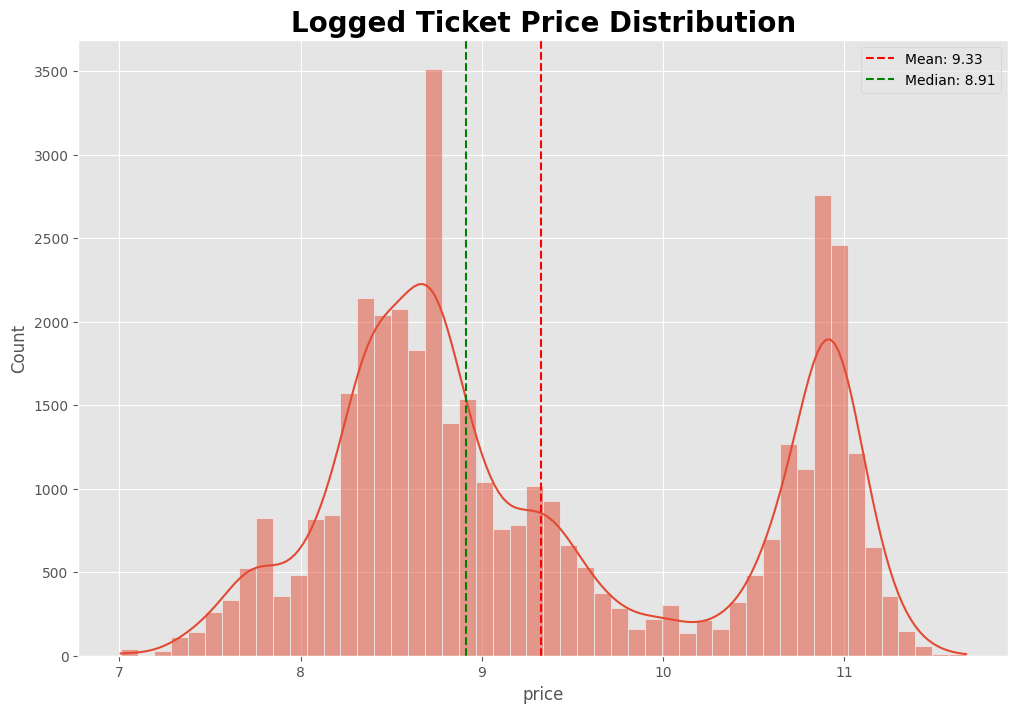

In [35]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

plt.figure(figsize=(12, 8))
sns.histplot(y_train_log,
             bins=50,
             kde = True)
plt.axvline(y_train_log.mean(), color='red', linestyle='--', label=f'Mean: {y_train_log.mean():.2f}')
plt.axvline(y_train_log.median(), color='green', linestyle='--', label=f'Median: {y_train_log.median():.2f}')

plt.title('Logged Ticket Price Distribution', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

### Feature Selection

We drop the column 'flight" with flight numbers: this information is completely useless since it has zero impact on customers' decision when purchasing tickets:

In [36]:
df.drop(columns=['flight'], axis=1, inplace=True)
X_train.drop(columns=['flight'], axis=1, inplace=True)
X_test.drop(columns=['flight'], axis=1, inplace=True)
X_train_full.drop(columns=['flight'], axis=1, inplace=True)
X_test_full.drop(columns=['flight'], axis=1, inplace=True)



A quick look into the first 5 rows of our training data:

In [37]:
X_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
7253,GO_FIRST,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.08,37
125056,Indigo,Kolkata,Afternoon,one,Night,Delhi,Economy,5.42,35
174188,Vistara,Hyderabad,Morning,two_or_more,Night,Kolkata,Economy,11.75,31
106209,Vistara,Bangalore,Morning,one,Evening,Kolkata,Economy,7.33,26
161699,GO_FIRST,Hyderabad,Night,one,Late_Night,Mumbai,Economy,5.17,24


### Feature Engineering

#### Feature Interaction: Combining Source and Destination Cities

In [38]:
X_train.loc[:, 'route'] = X_train['source_city'] + "_" + X_train['destination_city']
X_train.drop(columns=['source_city', 'destination_city'], axis=1, inplace=True)

X_test.loc[:, 'route'] = X_test['source_city'] + "_" + X_test['destination_city']
X_test.drop(columns=['source_city', 'destination_city'], axis=1, inplace=True)

X_train_full.loc[:, 'route'] = X_train_full['source_city'] + "_" + X_train_full['destination_city']
X_train_full.drop(columns=['source_city', 'destination_city'], axis=1, inplace=True)

X_test_full.loc[:, 'route'] = X_test_full['source_city'] + "_" + X_test_full['destination_city']
X_test_full.drop(columns=['source_city', 'destination_city'], axis=1, inplace=True)

By combining the features mentioned above, we are able to create a unique identifier for each route. Such feature engineering, where we create new features from the existing ones will most likely simplify our analysis, handle the categorical variables, and potentially improve our model performance.

In [39]:
X_train['route'].unique().shape

(30,)

As a result, we have obtained 30 columns for the possible route, (6 * 6) - 6 = 30, since we do not consider/(allow) flights inside the city.

#### One-Hot Encoding

Using One-Hot Encoding, we convert categorical variables into a numerical format suitable for machine learning algorithms, also ensuring that no ordinal relationship is implied between categories (i.e. category 2 > category 1):

In [40]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype=='object']

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[categorical_cols])

X_train_ohe = ohe.transform(X_train[categorical_cols]).toarray()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(categorical_cols))

X_train_num = X_train.drop(columns=categorical_cols)

X_train_num = X_train_num.reset_index(drop=True)
X_train_ohe = X_train_ohe.reset_index(drop=True)

X_train = pd.concat([X_train_num, X_train_ohe], axis=1)

X_train.head()



,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,departure_time_Early_Morning,...,route_Kolkata_Bangalore,route_Kolkata_Chennai,route_Kolkata_Delhi,route_Kolkata_Hyderabad,route_Kolkata_Mumbai,route_Mumbai_Bangalore,route_Mumbai_Chennai,route_Mumbai_Delhi,route_Mumbai_Hyderabad,route_Mumbai_Kolkata
0,2.08,37,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.42,35,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.75,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.33,26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.17,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
categorical_cols = [col for col in X_train_full.columns if X_train_full[col].dtype=='object']

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_full[categorical_cols])

X_train_ohe = ohe.transform(X_train_full[categorical_cols]).toarray()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(categorical_cols))

X_train_num = X_train_full.drop(columns=categorical_cols)

X_train_num = X_train_num.reset_index(drop=True)
X_train_ohe = X_train_ohe.reset_index(drop=True)

X_train_full = pd.concat([X_train_num, X_train_ohe], axis=1)

X_train_full.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,departure_time_Early_Morning,...,route_Kolkata_Bangalore,route_Kolkata_Chennai,route_Kolkata_Delhi,route_Kolkata_Hyderabad,route_Kolkata_Mumbai,route_Mumbai_Bangalore,route_Mumbai_Chennai,route_Mumbai_Delhi,route_Mumbai_Hyderabad,route_Mumbai_Kolkata
0,19.42,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.00,13,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.17,44,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.25,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.50,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As a result of this transformation, binary columns were created for each category.

In [42]:
X_test_ohe = ohe.transform(X_test[categorical_cols]).toarray()
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(categorical_cols))

# Create a new DataFrame without the categorical columns
X_test_num = X_test.drop(columns=categorical_cols)

# Reset the index of both dataframes
X_test_num = X_test_num.reset_index(drop=True)
X_test_ohe = X_test_ohe.reset_index(drop=True)

# Concatenate the numerical and one-hot encoded categorical columns
X_test = pd.concat([X_test_num, X_test_ohe], axis=1)

X_test.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,departure_time_Early_Morning,...,route_Kolkata_Bangalore,route_Kolkata_Chennai,route_Kolkata_Delhi,route_Kolkata_Hyderabad,route_Kolkata_Mumbai,route_Mumbai_Bangalore,route_Mumbai_Chennai,route_Mumbai_Delhi,route_Mumbai_Hyderabad,route_Mumbai_Kolkata
0,5.58,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.83,32,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.67,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.00,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,9.17,23,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_test_ohe = ohe.transform(X_test_full[categorical_cols]).toarray()
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(categorical_cols))

# Create a new DataFrame without the categorical columns
X_test_num = X_test_full.drop(columns=categorical_cols)

# Reset the index of both dataframes
X_test_num = X_test_num.reset_index(drop=True)
X_test_ohe = X_test_ohe.reset_index(drop=True)

# Concatenate the numerical and one-hot encoded categorical columns
X_test_full = pd.concat([X_test_num, X_test_ohe], axis=1)

X_test_full.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,departure_time_Early_Morning,...,route_Kolkata_Bangalore,route_Kolkata_Chennai,route_Kolkata_Delhi,route_Kolkata_Hyderabad,route_Kolkata_Mumbai,route_Mumbai_Bangalore,route_Mumbai_Chennai,route_Mumbai_Delhi,route_Mumbai_Hyderabad,route_Mumbai_Kolkata
0,19.75,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.83,42,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10.50,41,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.50,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.25,20,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      40000 non-null  float64
 1   days_left                     40000 non-null  int64  
 2   airline_AirAsia               40000 non-null  float64
 3   airline_Air_India             40000 non-null  float64
 4   airline_GO_FIRST              40000 non-null  float64
 5   airline_Indigo                40000 non-null  float64
 6   airline_SpiceJet              40000 non-null  float64
 7   airline_Vistara               40000 non-null  float64
 8   departure_time_Afternoon      40000 non-null  float64
 9   departure_time_Early_Morning  40000 non-null  float64
 10  departure_time_Evening        40000 non-null  float64
 11  departure_time_Late_Night     40000 non-null  float64
 12  departure_time_Morning        40000 non-null  float64
 13  d

In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      10000 non-null  float64
 1   days_left                     10000 non-null  int64  
 2   airline_AirAsia               10000 non-null  float64
 3   airline_Air_India             10000 non-null  float64
 4   airline_GO_FIRST              10000 non-null  float64
 5   airline_Indigo                10000 non-null  float64
 6   airline_SpiceJet              10000 non-null  float64
 7   airline_Vistara               10000 non-null  float64
 8   departure_time_Afternoon      10000 non-null  float64
 9   departure_time_Early_Morning  10000 non-null  float64
 10  departure_time_Evening        10000 non-null  float64
 11  departure_time_Late_Night     10000 non-null  float64
 12  departure_time_Morning        10000 non-null  float64
 13  de

Now, since all points of our train and test data sets are of the same numerical format, we can start with model training.

## Model training

###Model Evaluation and Feature Importance Analysis

Summarizing the model performances, highlighting the most important features, and suggesting next steps for fine-tuning the most promising models.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

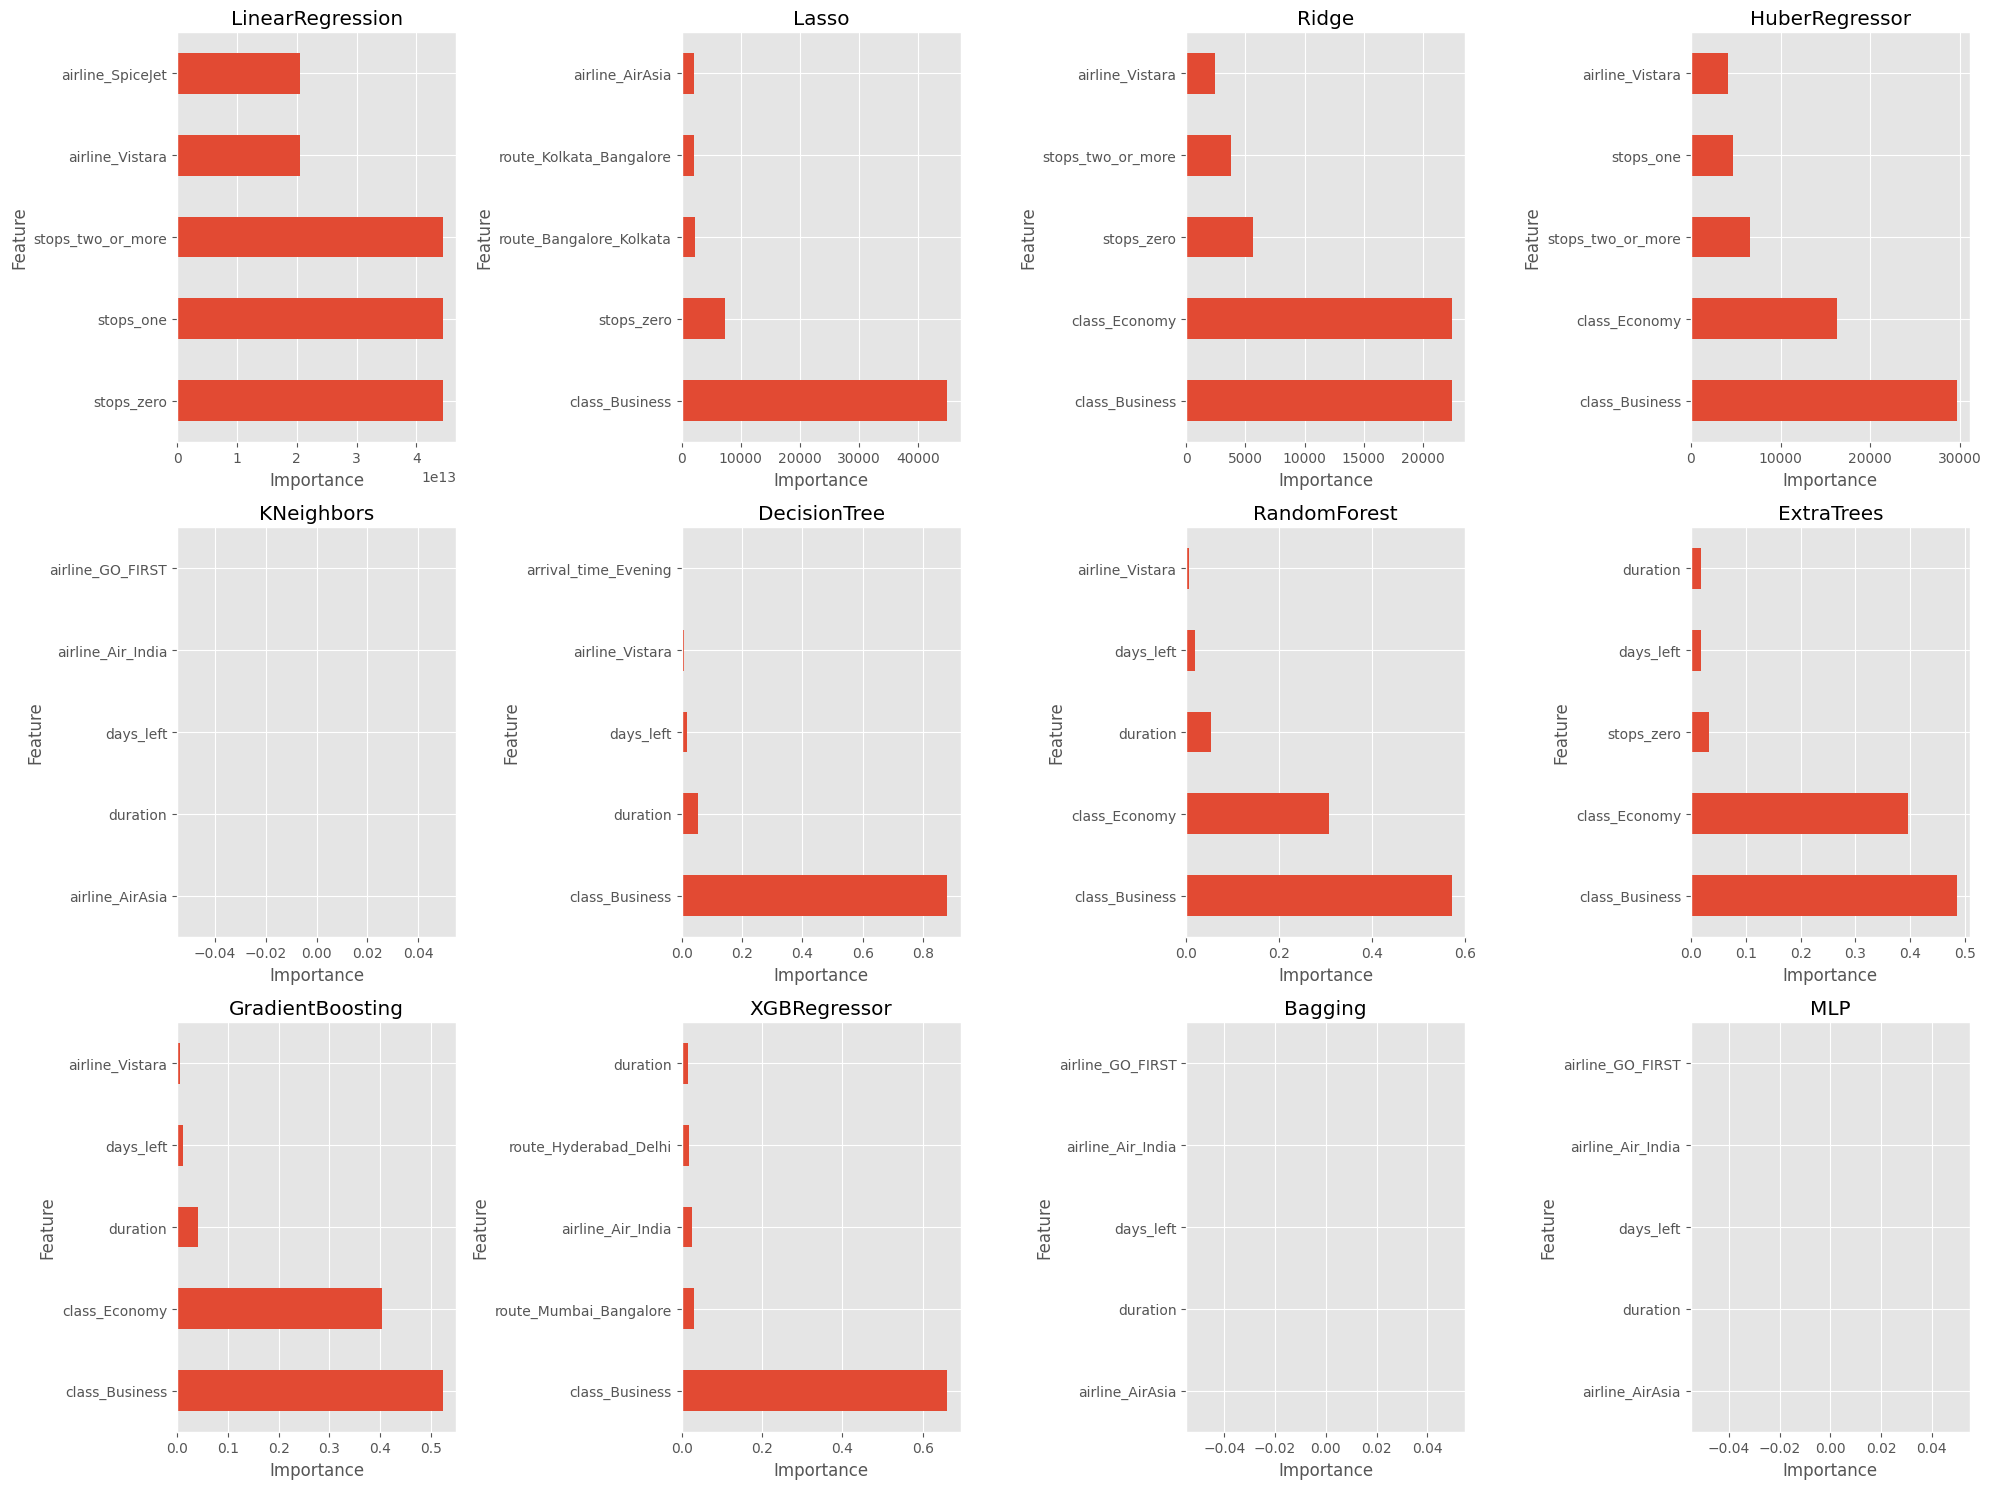

In [ ]:
# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'HuberRegressor': HuberRegressor(max_iter=1000),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'Bagging': BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10),
    'MLP': MLPRegressor(max_iter=1000)
}

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'R2'])

# Function to get and collect feature importances
def get_feature_importances(model, model_name, X_train, top_n=5):
    if hasattr(model, 'coef_'):
        importances = abs(model.coef_)
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = np.zeros(X_train.shape[1])

    feature_importances = pd.Series(importances, index=X_train.columns)
    top_features = feature_importances.nlargest(top_n)
    top_features.name = model_name  # Set the series name to model_name

    return top_features

# Evaluate each model
all_results = []
all_feature_importances = pd.DataFrame()

for name, model in models.items():
    # Perform cross-validation
    mae_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
    r2_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')

    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    result = {
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }
    all_results.append(result)

    # Get top features and collect feature importances
    top_features = get_feature_importances(model, name, X_train, top_n=5)
    all_feature_importances = pd.concat([all_feature_importances, top_features], axis=1)

# Convert results to DataFrame
results = pd.DataFrame(all_results)

# Sort results by MAE
results = results.sort_values(by='MAE')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, (model_name, importances) in enumerate(all_feature_importances.items()):
    top_5_importances = importances.nlargest(5)  # Select top 5 importances
    top_5_importances.plot(kind='barh', ax=axes[i], title=model_name)
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('Feature')

plt.tight_layout()
plt.show()


In [ ]:
results.reset_index(inplace=True)
results.drop(columns=['index'], inplace=True)
results

,Model,MAE,RMSE,R2
0,ExtraTrees,1519.348928,3368.160398,0.978130
1,RandomForest,1561.068588,3250.603931,0.979630
2,Bagging,1628.844087,3405.791053,0.977639
3,DecisionTree,1670.188500,4199.845198,0.965996
4,XGBRegressor,2051.714682,3596.166901,0.975069
5,GradientBoosting,2943.492004,5011.695285,0.951580
6,MLP,4165.960169,6234.110192,0.925078
7,HuberRegressor,4203.699501,7179.441857,0.900634
8,Lasso,4582.153911,6804.249546,0.910748
9,Ridge,4585.627956,6803.900272,0.910757


Here we can compare performances of our "dirty" models and select couple of the most promising to fine-tune them.

We see that tree-based models give us the best performance, but in educational purposes let's also try to tune some linear models and MLPRegressor.

Defining a function to plot a learning curve, which could tell us about over or underfitting or possible benefits from enlarging training dataset.

In [46]:
def plot_learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, title='Learning Curve'):

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X, y=y,
        cv=cv,
        scoring=scoring,
        train_sizes=train_sizes,
        n_jobs=n_jobs
    )

    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Defining functions for metrics calculation for all models. We consider R2, RMSE, MAE, MAPE.

In [47]:
def calculate_metrics(y_pred_train, y_pred_test, model_name="Model"):
    # Assuming y_train and y_test are global variables or defined elsewhere in your script
    metrics = {
        'train': {
            'r2': r2_score(y_train, y_pred_train),
            'rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
            'mae': mean_absolute_error(y_train, y_pred_train),
            'mape': mean_absolute_percentage_error(y_train, y_pred_train)
        },
        'test': {
            'r2': r2_score(y_test, y_pred_test),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae': mean_absolute_error(y_test, y_pred_test),
            'mape': mean_absolute_percentage_error(y_test, y_pred_test)
        }
    }

    # Print metrics for the model
    print(f'\n{model_name} Metrics:')
    for dataset in ['train', 'test']:
        print(f'  {dataset.capitalize()} Set:')
        print(f'    R2 Score: {metrics[dataset]["r2"]:.5f}')
        print(f'    RMSE: {metrics[dataset]["rmse"]:.5f}')
        print(f'    MAE: {metrics[dataset]["mae"]:.5f}')
        print(f'    MAPE: {metrics[dataset]["mape"]:.5f}')


In [48]:
def calculate_metrics_full(y_pred_train, y_pred_test, model_name="Model"):
    # Assuming y_train and y_test are global variables or defined elsewhere in your script
    metrics = {
        'train': {
            'r2': r2_score(y_train_full, y_pred_train),
            'rmse': np.sqrt(mean_squared_error(y_train_full, y_pred_train)),
            'mae': mean_absolute_error(y_train_full, y_pred_train),
            'mape': mean_absolute_percentage_error(y_train_full, y_pred_train)
        },
        'test': {
            'r2': r2_score(y_test_full, y_pred_test),
            'rmse': np.sqrt(mean_squared_error(y_test_full, y_pred_test)),
            'mae': mean_absolute_error(y_test_full, y_pred_test),
            'mape': mean_absolute_percentage_error(y_test_full, y_pred_test)
        }
    }


    return metrics

## Fine-Tuning the System

### Polynomial Regression

Let's try to increase complexity of a Linear Regression with Polynomial Features, using GridSearch to find the best degree of polynomial:

Best parameters: {'regressor__pca__n_components': 40, 'regressor__poly__degree': 1}
Best cross-validation score: 4585.626467539792

Polynomial Regression Metrics:
  Train Set:
    R2 Score: 0.88277
    RMSE: 7746.40670
    MAE: 4577.75621
    MAPE: 0.26436
  Test Set:
    R2 Score: 0.88962
    RMSE: 7567.01488
    MAE: 4499.51610
    MAPE: 0.26571


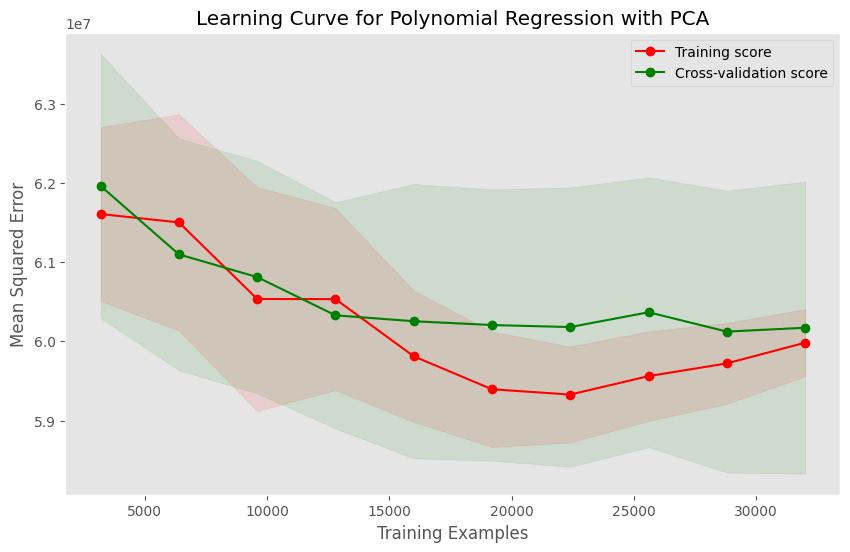

Elapsed time for GridSearchCV (Polynomial): 70.29 seconds


In [ ]:
start_time = time.time()

transformer = FunctionTransformer(np.log, inverse_func=np.exp, validate=True)

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('pca', PCA()),  # Add PCA here
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model = TransformedTargetRegressor(regressor=pipeline, transformer=transformer)

param_grid = {
    'regressor__poly__degree': [1, 2],
    'regressor__pca__n_components': [10, 20, 30, 40]  # Range of PCA components to try
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model_poly = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

train_pred = best_model_poly.predict(X_train)
test_pred = best_model_poly.predict(X_test)

calculate_metrics(train_pred, test_pred, "Polynomial Regression")

plot_learning_curve(best_model_poly, X_train, y_train, title='Learning Curve for Polynomial Regression with PCA')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for GridSearchCV (Polynomial): {elapsed_time:.2f} seconds")

In [ ]:
transformer = FunctionTransformer(np.log, inverse_func=np.exp, validate=True)

best_model_poly = TransformedTargetRegressor(regressor=Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('pca', PCA(n_components=40)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
]), transformer=transformer)

We try to apply PolynomialFeatures up to degree 2, because of the RAM issue
when we try to fit higher degree polynomial.

After trying PCA and reducing the amount of folders in CV, we still face this problem.

We got MAE 4500, which is almost the same as our "dirty" Linear Regression.

* The curve shows a steady decline, indicating that the model is learning and improving its performance on the training data as more examples are added.
* The final training error stabilizes around a lower MSE value, suggesting the model has learned well from the training data.
* Initially, the cross-validation error decreases at a similar rate to the training error, indicating that the model generalizes well to unseen data.
* A small gap indicates that the model is not overfitting (where training error is much lower than cross-validation error) and is performing consistently on both training and validation sets.

### Huber Regressor

Here we use Huber Regressor, which should help us if outliers make a difference in our case.

Huber Regression: This is a type of robust regression that is less sensitive to outliers. Unlike Ridge regression, Huber regression uses a different type of loss function called the Huber loss. The Huber loss behaves like the mean squared error when the error is small, but like the mean absolute error when the error is large - this makes it less sensitive to outliers when compared to the squared error loss.      

So, while both Ridge and Huber involve a form of L2 regularization, they apply it in different ways and to different aspects of the regression problem. Ridge applies L2 regularization to the coefficients to control model complexity, while Huber uses a loss function that is less sensitive to outliers.

In [ ]:
pipeline_hub = Pipeline([
    ('scaler', StandardScaler()),
    ('hub', HuberRegressor(max_iter=1000))
])

Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('hub',
                 HuberRegressor(alpha=0.18420699693267145, epsilon=1.4,
                                max_iter=1000))])

Huber Regressor Metrics:
  Train Set:
    R2 Score: 0.90575
    RMSE: 6945.67623
    MAE: 4117.67319
    MAPE: 0.30099
  Test Set:
    R2 Score: 0.90156
    RMSE: 7145.85867
    MAE: 4216.04143
    MAPE: 0.30701
Cross-validated RMSE: 6949.169195287733


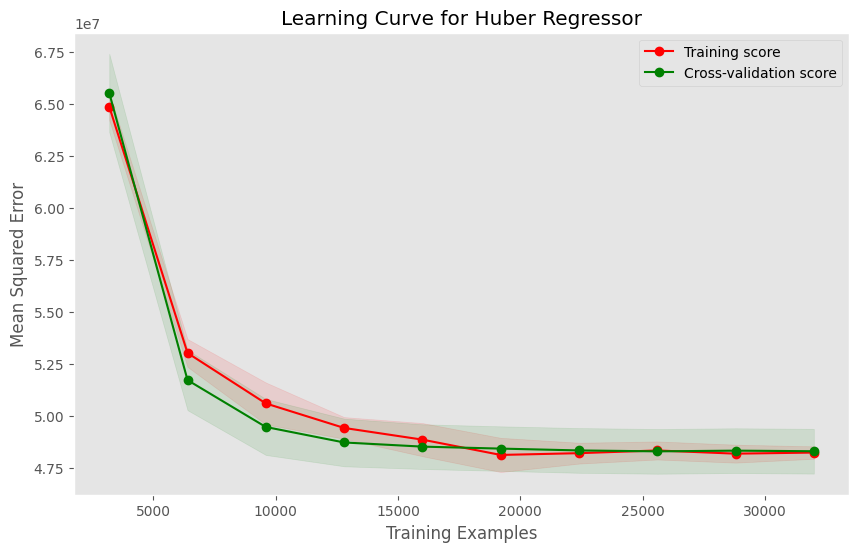

Elapsed time for GridSearchCV (Huber): 575.73 seconds


In [ ]:
start_time = time.time()

param_grid_hub = {
    'hub__alpha': np.logspace(-4, 4, 50),
    'hub__epsilon': [1.1, 1.2, 1.3, 1.4]
}

grid_search_hub = GridSearchCV(pipeline_hub, param_grid_hub, scoring='r2', cv=5)

grid_search_hub.fit(X_train, y_train)

best_model_hub = grid_search_hub.best_estimator_

y_pred_hub_train = best_model_hub.predict(X_train)
y_pred_hub_test = best_model_hub.predict(X_test)

print('Best model:', best_model_hub)

calculate_metrics(y_pred_hub_train, y_pred_hub_test, "Huber Regressor")
scores = cross_val_score(grid_search_hub.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated RMSE:', np.mean(np.sqrt(-scores)))

plot_learning_curve(best_model_hub, X_train, y_train, title='Learning Curve for Huber Regressor')

end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for GridSearchCV (Huber): {elapsed_time:.2f} seconds")

In [ ]:
best_model_hub = Pipeline([
    ('scaler', StandardScaler()),
    ('hub', HuberRegressor(alpha=0.18420699693267145, epsilon=1.4, max_iter=1000))
])

Huber Regressor performed a little better than other linear models, likely because it's less sensetive to outliers.

But still hyperparameter tuning didn't give us drastic improvement.

### Random Forest Regressor

Random Forest is a powerful machine learning algorithm that is widely used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the mean prediction (regression).

Since hyperparameter tuning with GridSearchCV would probably take a long time (because it searches the full space of available parameter values), we'll try to use another optimization library named hyperopt.
Hyperopt uses a popular alternative to tune the model hyperparameters called Bayesian Optimization.

Bayesian Optimization is a probabilistic model-based technique used to find minimum of any function. This approach can yield better performance on the test set while it requires fewer iterations than random search. It takes into account past evaluations when choosing the optimal set of hyperparameters. Thus it chooses its parameter combinations in an informed way. In doing so, it focuses on those parameters that yield the best possible scores. Thus, this technique requires less number of iterations to find the optimal set of parameter values. It ignores those areas of the parameter space that are useless. Hence, it is less time-consuming.



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.9641405109202088


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Random Forest Regressor Metrics:
  Train Set:
    R2 Score: 0.97172
    RMSE: 3804.90621
    MAE: 2047.27419
    MAPE: 0.13247
  Test Set:
    R2 Score: 0.96385
    RMSE: 4330.40679
    MAE: 2336.73706
    MAPE: 0.15239


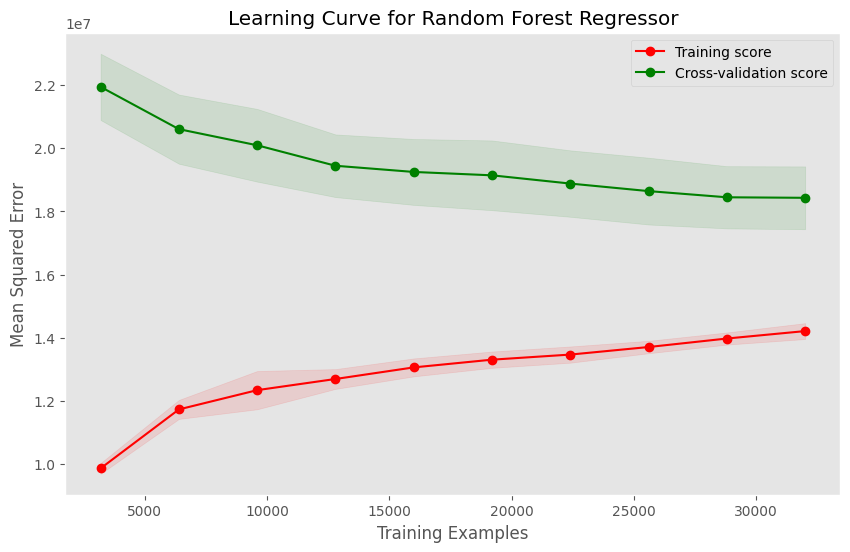

Elapsed time for GridSearchCV (RandomForest): 10171.34 seconds


In [ ]:
start_time = time.time()

# Define the search space

param_grid = {
    'n_estimators': [100, 150],  # Reduced the upper range to limit complexity
    'max_features': ['auto', 'sqrt', 'log2'],  # Added 'log2' to consider fewer features at each split
    'max_depth': [5, 10, 15],  # Reduced the range to prevent very deep trees
    'min_samples_split': [2, 5, 10],  # Added to control the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Added to ensure a minimum number of samples at the leaf nodes
    'bootstrap': [True, False]  # Added to explore the effect of bootstrap sampling
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_forest_gs = grid_search.best_estimator_

best_forest_gs.fit(X_train, y_train)

y_train_pred = best_forest_gs.predict(X_train)
y_test_pred = best_forest_gs.predict(X_test)

calculate_metrics(y_train_pred, y_test_pred, "Random Forest Regressor")
plot_learning_curve(best_forest_gs, X_train, y_train, title='Learning Curve for Random Forest Regressor')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for GridSearchCV (RandomForest): {elapsed_time:.2f} seconds")

In [ ]:
best_forest_gs = RandomForestRegressor(bootstrap=True, max_depth=15, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=150)

100%|██████████| 20/20 [10:44<00:00, 32.24s/trial, best loss: 20175237.425944667]
Best parameters: {'bootstrap': 0, 'max_depth': 13.0, 'max_features': 0, 'min_samples_leaf': 4.0, 'min_samples_split': 4.0, 'n_estimators': 150.0}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Random Forest Regressor Metrics:
  Train Set:
    R2 Score: 0.96495
    RMSE: 4235.51196
    MAE: 2342.95637
    MAPE: 0.15166
  Test Set:
    R2 Score: 0.96062
    RMSE: 4519.90641
    MAE: 2485.52781
    MAPE: 0.16249


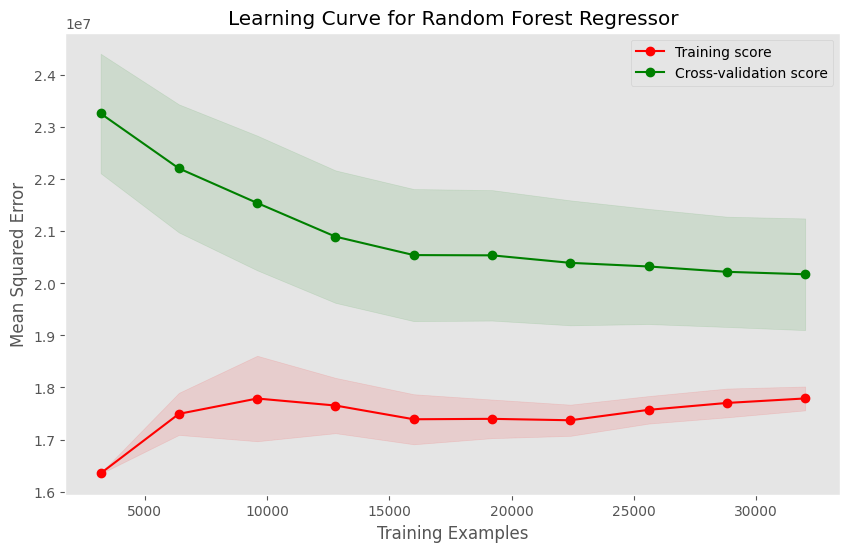

Elapsed time for HyperOpt (RandomForest): 1123.86 seconds


In [ ]:
start_time = time.time()

# Define a narrower search space
search_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 150, 10)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 5, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 4, 1)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
    'bootstrap': hp.choice('bootstrap', [True, False])
}

def objective(params):
    rf = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42
    )
    score = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return {'loss': score, 'status': STATUS_OK}

trials = Trials()
best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=20, trials=trials)

print("Best parameters:", best_params)

# Convert the best_params to the format expected by the regressor
best_params_converted = {
    'n_estimators': int(best_params['n_estimators']),
    'max_depth': int(best_params['max_depth']),
    'min_samples_split': int(best_params['min_samples_split']),
    'min_samples_leaf': int(best_params['min_samples_leaf']),
    'max_features': ['auto', 'sqrt'][best_params['max_features']],
    'bootstrap': [True, False][best_params['bootstrap']]
}

best_forest_ho = RandomForestRegressor(**best_params_converted, random_state=42)
best_forest_ho.fit(X_train, y_train)

train_pred = best_forest_ho.predict(X_train)
test_pred = best_forest_ho.predict(X_test)

calculate_metrics(train_pred, test_pred, "Random Forest Regressor")
plot_learning_curve(best_forest_ho, X_train, y_train, title='Learning Curve for Random Forest Regressor')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for HyperOpt (RandomForest): {elapsed_time:.2f} seconds")

We can see the computational time difference on our models.

GridSearch needed around 169 minutes to get the work done, while Hyperopt have done it in around 18 minutes.

Also, we can see that params acquired with GridSearch give us better scores, but are overfitting a bit. But Hyperopt params give us better generalization, which seem to be more robust estimation.

Comparison:

Yet, Random Forest model performs the best in terms of mean squared error compared to the linear and polynomial regression models. It has the lowest cross-validation error among the three, indicating better generalization.

The linear regression model showed the smallest gap between training and validation errors, indicating less overfitting.


### XGBoost Regressor

XGBoost Regressor is another tree-based model, but while Random Forest relies on averaging predictions from many independent trees to improve robustness, XGBoost builds trees sequentially, where each new tree tries to correct the errors made by the previous trees. This process is known as boosting.

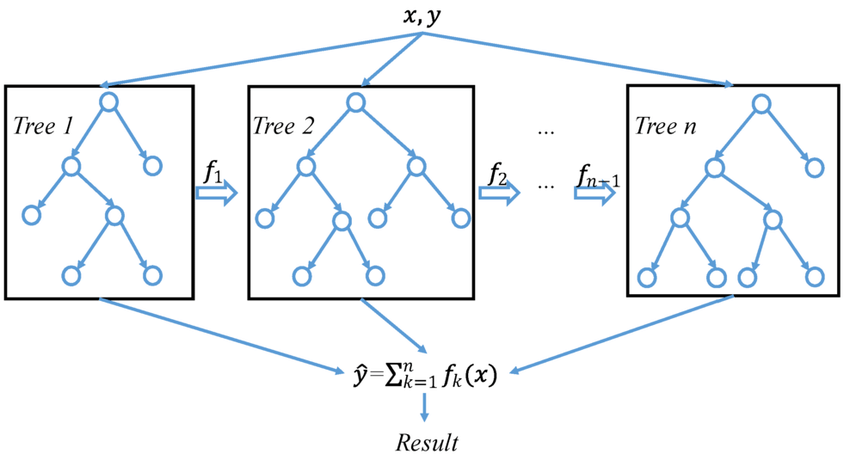

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score: 0.9638011523402191

XGBoost Regressor Metrics:
  Train Set:
    R2 Score: 0.96601
    RMSE: 4171.33015
    MAE: 2428.88379
    MAPE: 0.17197
  Test Set:
    R2 Score: 0.96372
    RMSE: 4338.10259
    MAE: 2510.80365
    MAPE: 0.17819


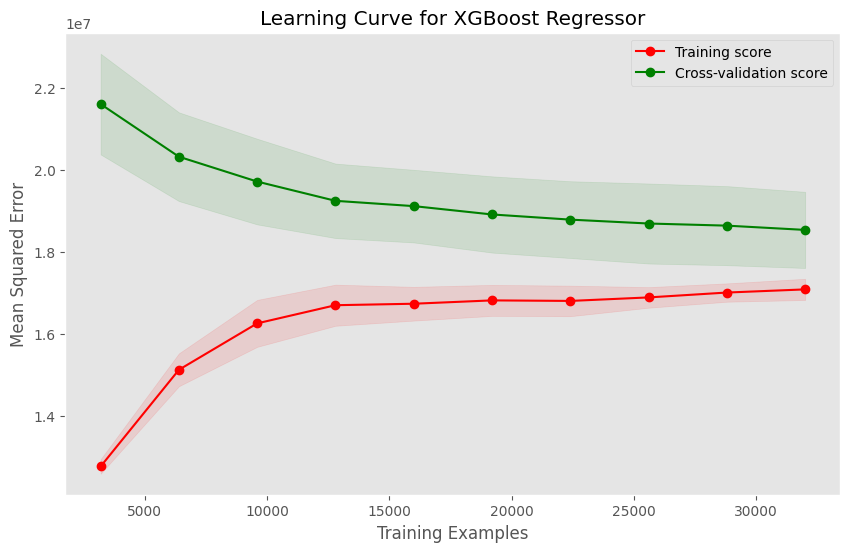

Elapsed time for GridSearchCV (XGBoost): 102.03 seconds


In [ ]:
start_time = time.time()

# Define the simplified parameter grid to search over
param_grid_xgb = {
    'n_estimators': [50, 100],  # Number of boosted trees to fit
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [3, 5],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

best_xgb_model_gs = grid_search_xgb.best_estimator_

best_xgb_model_gs.fit(X_train, y_train)

print("Best parameters:", grid_search_xgb.best_params_)
print("Best cross-validation score:", grid_search_xgb.best_score_)

y_pred_train_xgb = best_xgb_model_gs.predict(X_train)
y_pred_test_xgb = best_xgb_model_gs.predict(X_test)

calculate_metrics(y_pred_train_xgb, y_pred_test_xgb, "XGBoost Regressor")

plot_learning_curve(best_xgb_model_gs, X_train, y_train, title='Learning Curve for XGBoost Regressor')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for GridSearchCV (XGBoost): {elapsed_time:.2f} seconds")


The learning curve indicates that the XGBoost regressor benefits from more training data, as evidenced by the decreasing cross-validation error.
Gap between training and validation errors is even smaller than RFR, showing a good generalization

In [ ]:
best_xgb_model_gs = XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8)

### Extra Trees

Extra Trees, or Extremely Randomized Trees, is another ensemble learning method similar to Random Forest and XGBoost, but it introduces more randomness in the tree-building process.

Like Random Forest, Extra Trees builds an ensemble of decision trees. However, while Random Forest selects the best split from a random subset of features at each node, Extra Trees takes this a step further by also choosing the split point randomly, rather than the best possible split.

For regression tasks, Extra Trees average the predictions from all the individual trees.

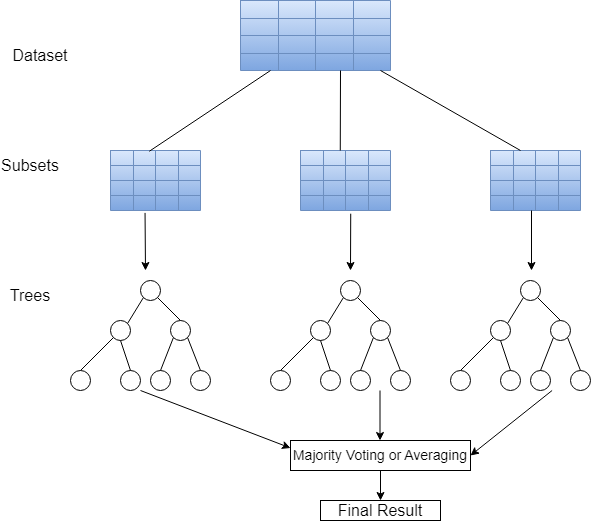

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.9666677266665424

Extra Trees Regressor Metrics:
  Train Set:
    R2 Score: 0.97798
    RMSE: 3356.88782
    MAE: 1531.58871
    MAPE: 0.09392
  Test Set:
    R2 Score: 0.96665
    RMSE: 4158.99296
    MAE: 2114.67365
    MAPE: 0.13795


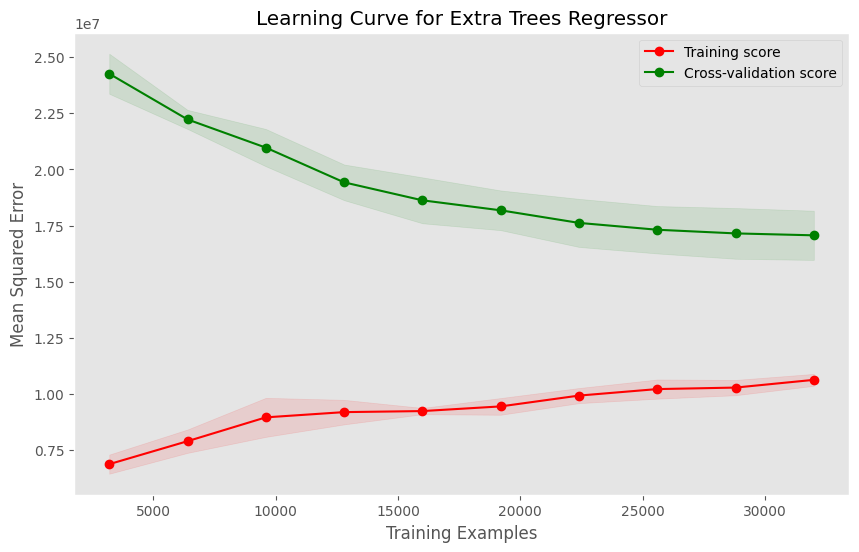

Elapsed time for GridSearchCV: 1704.72 seconds


In [ ]:
start_time = time.time()

# Define the parameter grid for Extra Trees Regressor

param_grid_extra_trees = {
    'n_estimators': [100, 150],  # A narrower range to reduce fits
    'max_depth': [10, 20],  # Focused on practical depths
    'min_samples_split': [2, 10]  # Critical to control overfitting and underfitting
}

et = ExtraTreesRegressor(random_state=42)

grid_search = GridSearchCV(estimator=et, param_grid=param_grid_extra_trees, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_extra_trees_gs = grid_search.best_estimator_

y_pred_train = best_extra_trees_gs.predict(X_train)
y_pred_test = best_extra_trees_gs.predict(X_test)

calculate_metrics(y_pred_train, y_pred_test, "Extra Trees Regressor")

plot_learning_curve(best_extra_trees_gs, X_train, y_train, title='Learning Curve for Extra Trees Regressor')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for GridSearchCV: {elapsed_time:.2f} seconds")


In [ ]:
# best_extra_trees_gs = ExtraTreesRegressor(max_depth=20, min_samples_split=2, n_estimators=150, random_state=42)

Learning curve for extra trees regressor shows signs of possible benefit from bigger training set, because cross-validation score haven't stabilized on given dataset. Also, gap between two curves is quite large, which shows overfitting


Now let us use HyperOpt and compare the results with GridSearch:

100%|██████████| 20/20 [04:21<00:00, 13.07s/trial, best loss: 19874577.701696314]
Best parameters: {'bootstrap': 0, 'max_depth': 14.0, 'max_features': 0, 'min_samples_leaf': 2.0, 'min_samples_split': 2.0, 'n_estimators': 120.0}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Extra Trees Regressor Metrics:
  Train Set:
    R2 Score: 0.96600
    RMSE: 4171.52487
    MAE: 2259.36910
    MAPE: 0.14639
  Test Set:
    R2 Score: 0.96210
    RMSE: 4434.16763
    MAE: 2414.41154
    MAPE: 0.15981


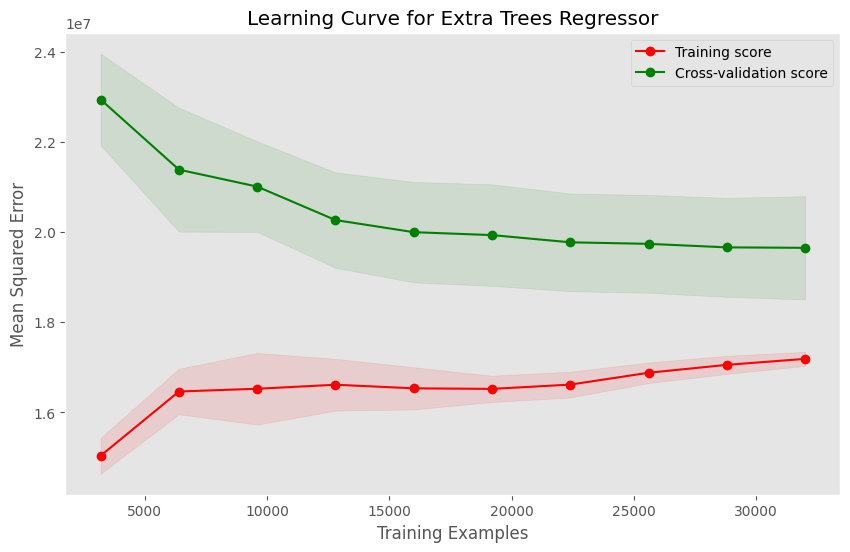

Elapsed time for HyperOpt (ExtraTrees): 574.99 seconds


In [ ]:
start_time = time.time()

search_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 150, 10)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 5, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 3, 1)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'bootstrap': hp.choice('bootstrap', [True, False])
}

def objective(params):
    et = ExtraTreesRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        bootstrap=params['bootstrap'],
        random_state=42
    )
    score = -cross_val_score(et, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return {'loss': score, 'status': STATUS_OK}

trials = Trials()
best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=20, trials=trials)

print("Best parameters:", best_params)

best_params_converted = {
    'n_estimators': int(best_params['n_estimators']),
    'max_depth': int(best_params['max_depth']),
    'min_samples_split': int(best_params['min_samples_split']),
    'min_samples_leaf': int(best_params['min_samples_leaf']),
    'max_features': ['auto', 'sqrt'][best_params['max_features']],
    'bootstrap': [True, False][best_params['bootstrap']]
}

best_extra_trees_ho = ExtraTreesRegressor(**best_params_converted, random_state=42)
best_extra_trees_ho.fit(X_train, y_train)

train_pred = best_extra_trees_ho.predict(X_train)
test_pred = best_extra_trees_ho.predict(X_test)

calculate_metrics(train_pred, test_pred, "Extra Trees Regressor")

plot_learning_curve(best_extra_trees_ho, X_train, y_train, title='Learning Curve for Extra Trees Regressor')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for HyperOpt (ExtraTrees): {elapsed_time:.2f} seconds")


In [ ]:
best_extra_trees_ho = ExtraTreesRegressor(bootstrap=False, max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=120, random_state=42)

Comparing this two models with different approaches to tuning, we can say that model 2 (hyperopt) should be preferred because it generalizes better to unseen data, despite having a slightly lower test score compared to Model 1 (GridSearchCV).

The better generalization is often more important in practical scenarios, as it indicates the model is more likely to perform well on new, unseen data.

After hyperparameter tuning our tree-based models performed significantly worse. That could be caused by exessively small value of max_depth.
In order to solve this problem, let's fix other parameters to default values and investigate dependence of this particular hyperparameter on our model's performance using randomized search and validation curves


Let's firstly consider the range from 1 to 15

Best parameters found:  {'max_depth': 15}
Extra Trees Regressor (Random Search) - Training R²: 0.9683563430868277
Extra Trees Regressor (Random Search) - Test R²: 0.9620276730874409
Extra Trees Regressor (Random Search) - Training MAE: 2089.0691366367882
Extra Trees Regressor (Random Search) - Test MAE: 2377.318028723043
Elapsed time for RandomizedSearchCV (ExtraTrees): 493.89 seconds


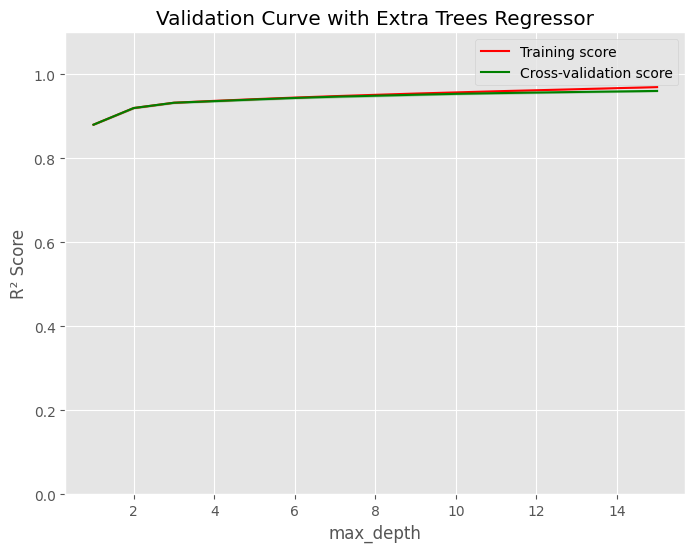

In [49]:
def calculate_metric(train_pred, test_pred, model_name):
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    mae_train = mean_absolute_error(y_train, train_pred)
    mae_test = mean_absolute_error(y_test, test_pred)
    print(f"{model_name} - Training R²: {r2_train}")
    print(f"{model_name} - Test R²: {r2_test}")
    print(f"{model_name} - Training MAE: {mae_train}")
    print(f"{model_name} - Test MAE: {mae_test}")

start_time = time.time()

param_dist = {
    'max_depth': randint(1, 16)  # Range for max_depth (1 to 15)
}

et = ExtraTreesRegressor(random_state=42)  

random_search = RandomizedSearchCV(estimator=et, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found: ", best_params)

best_params_converted = {
    'max_depth': best_params['max_depth'],
    'random_state': 42
}

best_extra_trees_rs = ExtraTreesRegressor(**best_params_converted)
best_extra_trees_rs.fit(X_train, y_train)

train_pred = best_extra_trees_rs.predict(X_train)
test_pred = best_extra_trees_rs.predict(X_test)

calculate_metric(train_pred, test_pred, "Extra Trees Regressor (Random Search)")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV (ExtraTrees): {elapsed_time:.2f} seconds")

param_range = np.arange(1, 16, 1)
train_scores, test_scores = validation_curve(
    ExtraTreesRegressor(random_state=42),
    X_train, y_train, param_name="max_depth", param_range=param_range,
    scoring="r2", n_jobs=-1, cv=3
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Validation Curve with Extra Trees Regressor")
plt.xlabel("max_depth")
plt.ylabel("R² Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()


Just as our previous tuned model, this one shows good generalization, but lower scores. Also, on a validation curve we see that in order to find a parameter which will give us the best R2 score, we need to go further to the left. So let's do it.

Now we consider the range from 15 to 45.

Best parameters found:  {'max_depth': 43}
Extra Trees Regressor (Random Search) - Training R²: 0.9997969246631528
Extra Trees Regressor (Random Search) - Test R²: 0.9782805105789717
Extra Trees Regressor (Random Search) - Training MAE: 59.809206822365404
Extra Trees Regressor (Random Search) - Test MAE: 1521.9535776855528
Elapsed time for RandomizedSearchCV (ExtraTrees): 1175.93 seconds


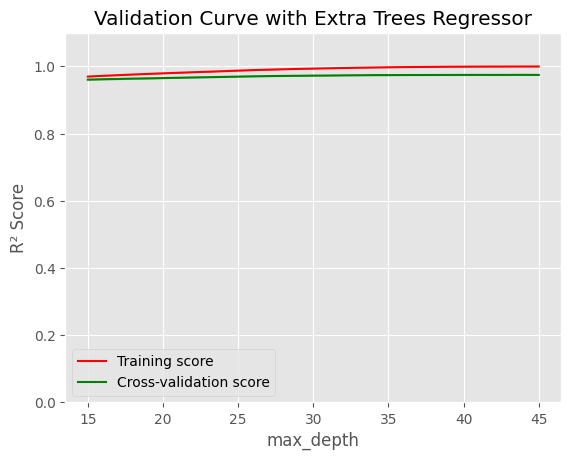

In [50]:
start_time = time.time()

param_dist = {
    'max_depth': randint(15, 46)  # Range for max_depth (15 to 45)
}

et = ExtraTreesRegressor(random_state=42)  # Ensure reproducibility

random_search = RandomizedSearchCV(estimator=et, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found: ", best_params)

best_params_converted = {
    'max_depth': best_params['max_depth'],
    'random_state': 42
}

best_extra_trees_rs = ExtraTreesRegressor(**best_params_converted)
best_extra_trees_rs.fit(X_train, y_train)

train_pred = best_extra_trees_rs.predict(X_train)
test_pred = best_extra_trees_rs.predict(X_test)

calculate_metric(train_pred, test_pred, "Extra Trees Regressor (Random Search)")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV (ExtraTrees): {elapsed_time:.2f} seconds")


param_range = np.arange(15, 46, 1)
train_scores, test_scores = validation_curve(
    ExtraTreesRegressor(random_state=42),
    X_train, y_train, param_name="max_depth", param_range=param_range,
    scoring="r2", n_jobs=-1, cv=3
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Validation Curve with Extra Trees Regressor")
plt.xlabel("max_depth")
plt.ylabel("R² Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()


With max_depth=43, which was suggested as a perfect one after Randomized search, we see obvious signs of overfitting. Training score is extremely close to 1 (perfect fit of a training data), but, even though, the test score is also better than the score of the model with max_depth=15, it's ability to perform as well on unseen data is questionable.

But the size of our test set gives us grounds to assume that well fit on a test data is not some kind of "luck". In that case, even model, which is overfitting will be preferable.

Similar analysis with validation curves would be a good addition to all of our tree-based models (except for XGBoost), but ExtraTreesRegressor showed the strongest overfitting and difference between tuned and non-tuned models, so we put priority to implement it here firstly.

### MLPRegressor

MLPRegressor, or Multi-Layer Perceptron Regressor, is a type of artificial neural network model used for regression tasks.

* **Network Structure:**
An MLP consists of an input layer, one or more hidden layers, and an
output layer. Each layer contains neurons that are fully connected to the neurons in the subsequent layer.

* **Activation Function:**
Neurons apply an activation function (like ReLU, sigmoid, or tanh) to the weighted sum of inputs to introduce non-linearity into the model.

* **Training:** The network is trained using backpropagation, where the weights of the connections are adjusted to minimize the error between the predicted and actual outputs. This is typically done using gradient descent optimization algorithms like Adam or stochastic gradient descent (SGD).

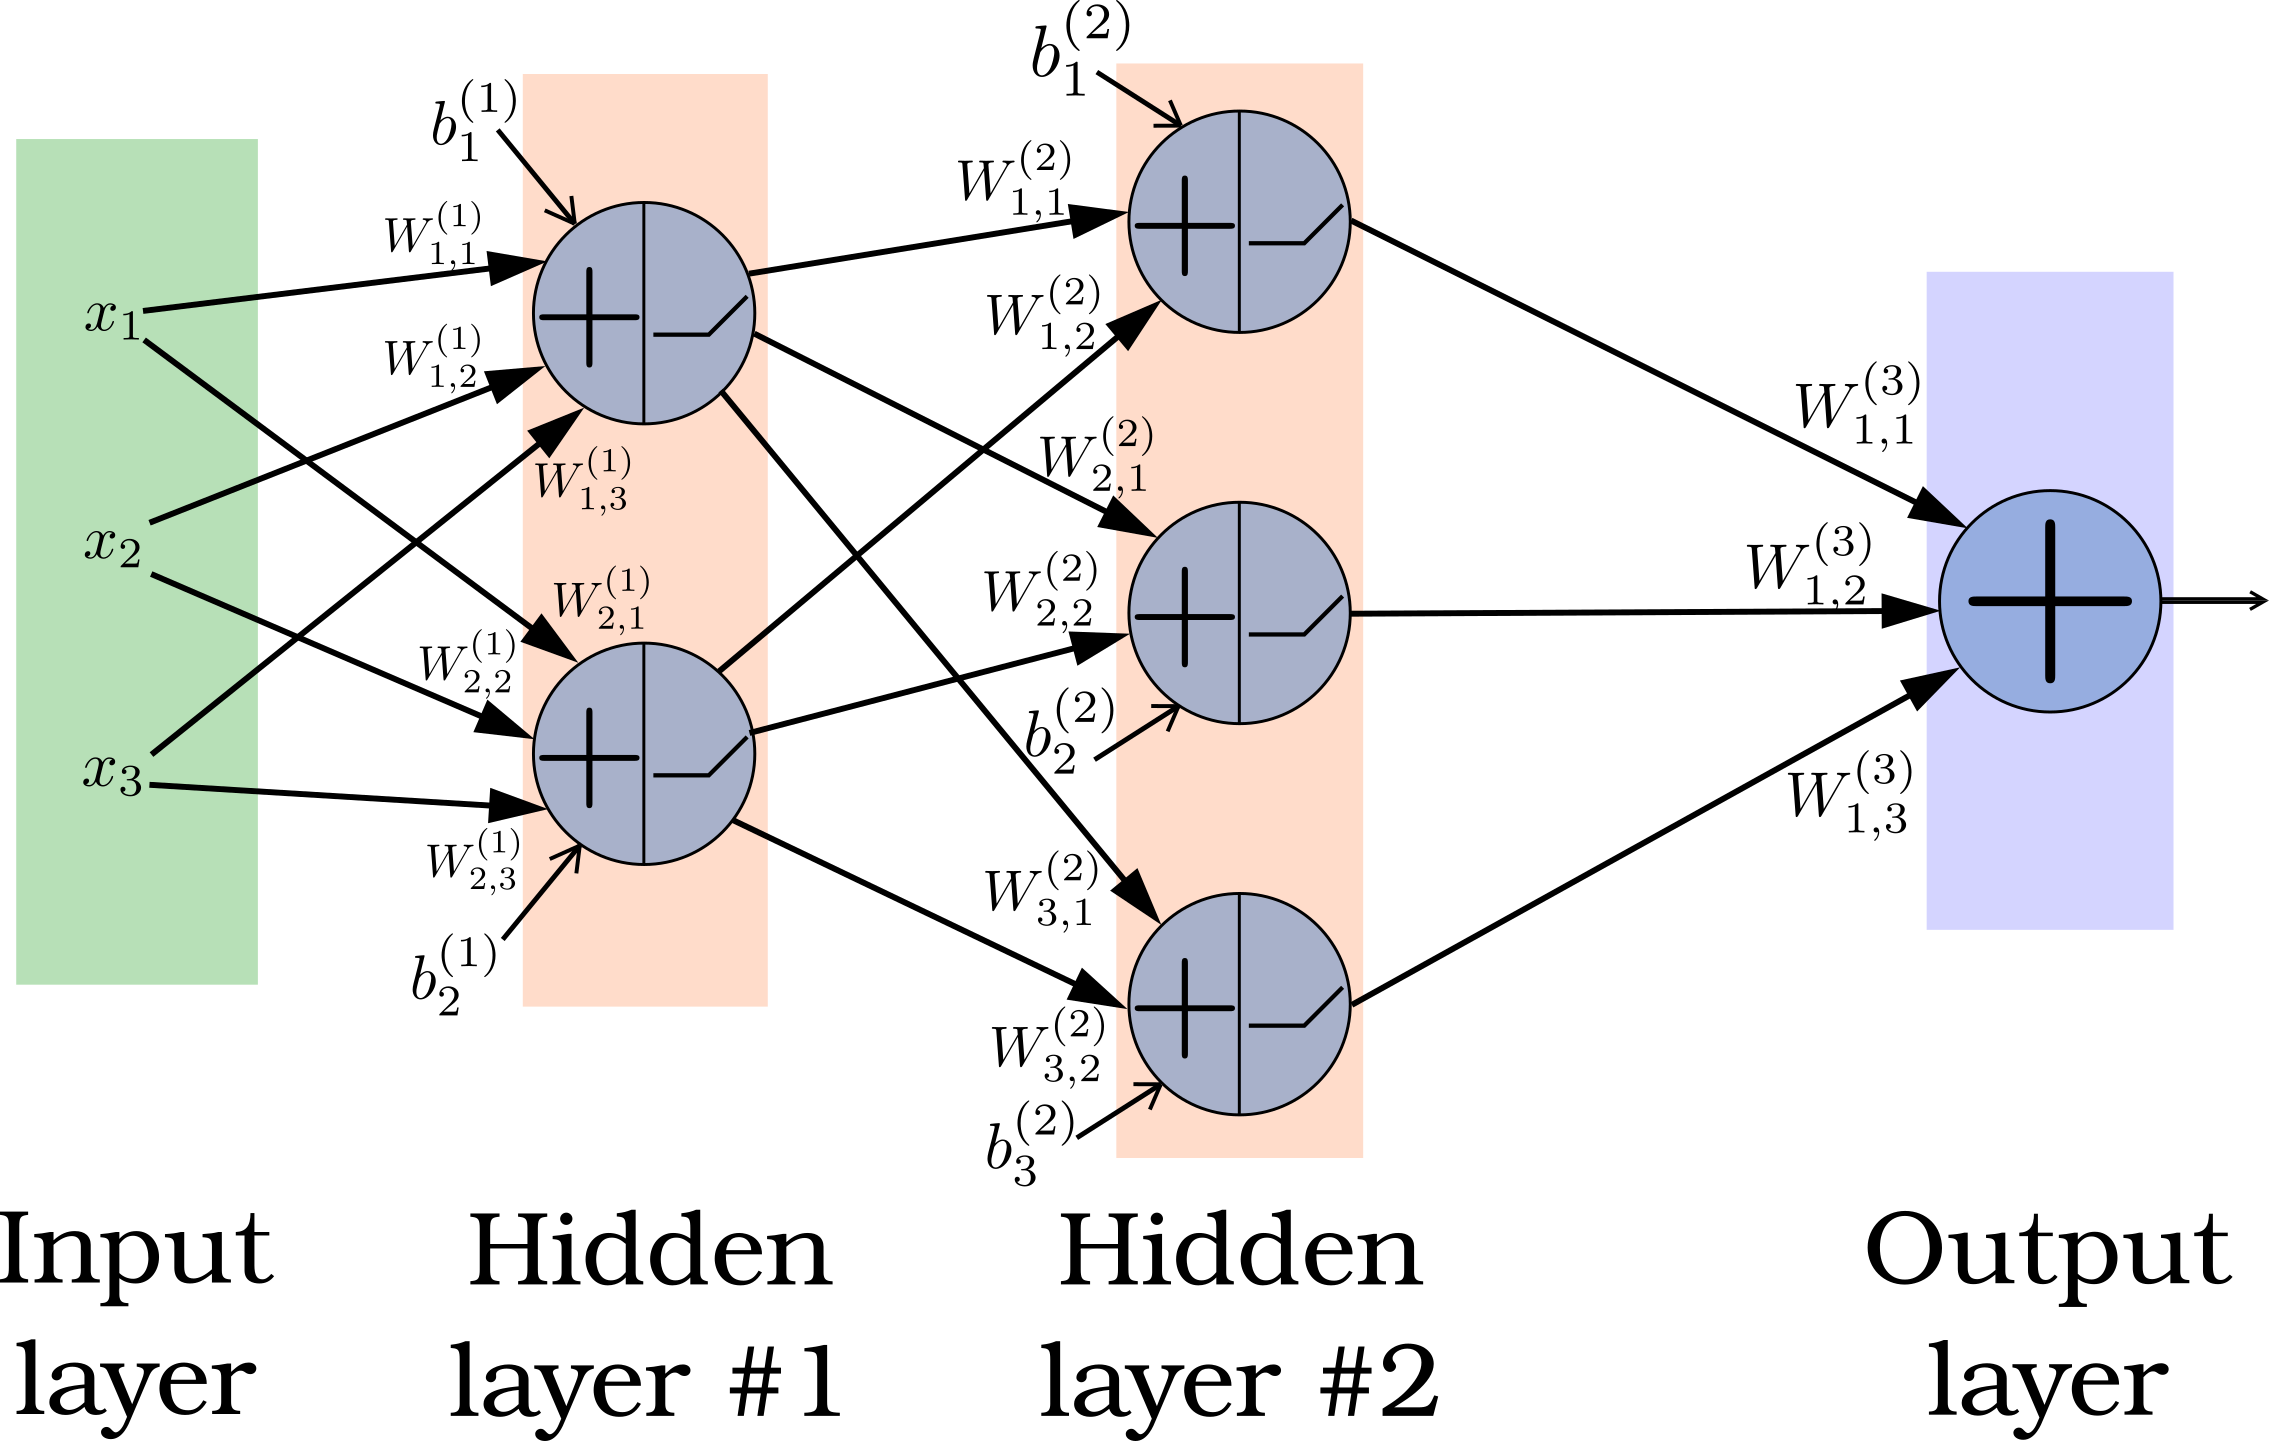

100%|██████████| 20/20 [30:32<00:00, 91.62s/trial, best loss: 25417566.46631883]
Best parameters: {'alpha': 0.09459393336021493, 'hidden_layer_sizes': 160.0, 'learning_rate': 1}

MLP Regressor Metrics:
  Train Set:
    R2 Score: 0.95184
    RMSE: 4965.20238
    MAE: 3037.64657
    MAPE: 0.23875
  Test Set:
    R2 Score: 0.95116
    RMSE: 5033.36032
    MAE: 3068.09689
    MAPE: 0.24246


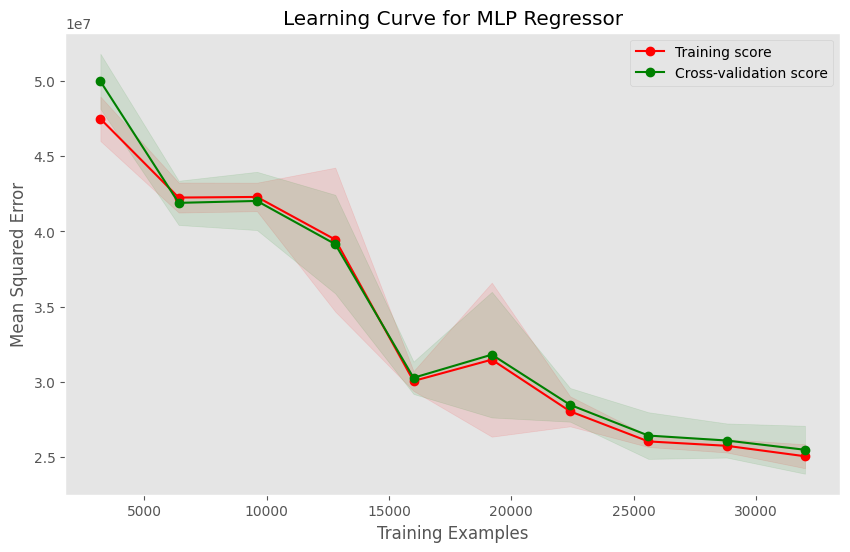

Elapsed time for HyperOpt (MLP): 3139.07 seconds


In [ ]:
start_time = time.time()

search_space = {
    'hidden_layer_sizes': scope.int(hp.quniform('hidden_layer_sizes', 50, 200, 10)),
    'alpha': hp.loguniform('alpha', np.log(1e-4), np.log(1e-1)),
    'learning_rate': hp.choice('learning_rate', ['constant', 'adaptive'])
}

def objective(params):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('mlp', MLPRegressor(
            hidden_layer_sizes=int(params['hidden_layer_sizes']),
            activation='relu',  
            solver='adam', 
            alpha=params['alpha'],
            learning_rate=params['learning_rate'],
            max_iter=1000,
            early_stopping=True,
            random_state=42
        ))
    ])
    try:
        score = -cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    except ValueError as e:
        return {'loss': np.inf, 'status': STATUS_FAIL}
    return {'loss': score, 'status': STATUS_OK}

trials = Trials()
best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=20, trials=trials)

print("Best parameters:", best_params)

best_params_converted = {
    'hidden_layer_sizes': int(best_params['hidden_layer_sizes']),
    'alpha': best_params['alpha'],
    'learning_rate': ['constant', 'adaptive'][best_params['learning_rate']]
}

best_mlp_ho = Pipeline([
    ('scaler', StandardScaler()),  
    ('mlp', MLPRegressor(
        hidden_layer_sizes=best_params_converted['hidden_layer_sizes'],
        activation='relu',  
        solver='adam', 
        alpha=best_params_converted['alpha'],
        learning_rate=best_params_converted['learning_rate'],
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ))
])
best_mlp_ho.fit(X_train, y_train)


train_pred = best_mlp_ho.predict(X_train)
test_pred = best_mlp_ho.predict(X_test)

calculate_metrics(train_pred, test_pred, "MLP Regressor")
plot_learning_curve(best_mlp_ho, X_train, y_train, title='Learning Curve for MLP Regressor')

end_time = time.time()


elapsed_time = end_time - start_time
print(f"Elapsed time for HyperOpt (MLP): {elapsed_time:.2f} seconds")

In [ ]:
best_mlp_ho = Pipeline([
    ('scaler', StandardScaler()),  
    ('mlp', MLPRegressor(hidden_layer_sizes=160,
                         alpha=0.09459393336021493,
                         learning_rate='constant',
                         activation='relu',
                         solver='adam',
                         max_iter=1000,
                         early_stopping=True,
                         random_state=42))
])

Best parameters: {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (150,), 'mlp__learning_rate': 'constant'}

MLP Regressor Metrics:
  Train Set:
    R2 Score: 0.95320
    RMSE: 4894.24894
    MAE: 2986.88287
    MAPE: 0.23828
  Test Set:
    R2 Score: 0.95243
    RMSE: 4967.40218
    MAE: 3021.79740
    MAPE: 0.24178


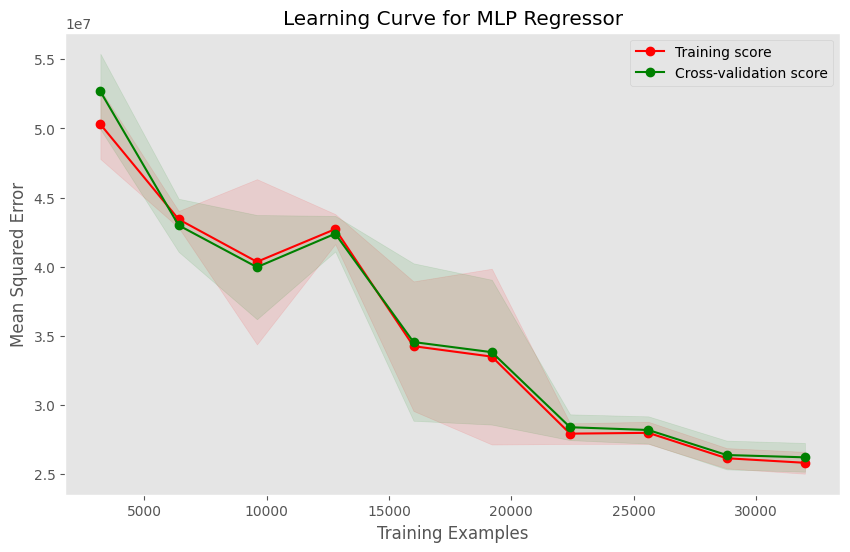

Elapsed time for GridSearch (MLP): 4456.03 seconds


In [ ]:
start_time = time.time()


param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'mlp__alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'mlp__learning_rate': ['constant', 'adaptive']
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('mlp', MLPRegressor(
        activation='relu',  
        solver='adam',  
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ))
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_mlp_gs = grid_search.best_estimator_
best_mlp_gs.fit(X_train, y_train)

train_pred = best_mlp_gs.predict(X_train)
test_pred = best_mlp_gs.predict(X_test)

calculate_metrics(train_pred, test_pred, "MLP Regressor")

plot_learning_curve(best_mlp_gs, X_train, y_train, title='Learning Curve for MLP Regressor')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for GridSearch (MLP): {elapsed_time:.2f} seconds")

We see that for MLPRegressor difference in computational time between hyperopt and GridSearchCV alghorithms is not so drastic, in comparison to previous models.

Also metrics on train and test data are practically identical, demonstrating absence of overfitting, which can also be proved by learning curves above, where training and validation curves have almost no gap between each other

## Performance comparison

Let's compare metrics of our models after hyperparameter tuning

In [ ]:
start_time = time.time()

tuned_models = [
    ('Polynomial Regression', best_model_poly),
    ('Huber Regressor', best_model_hub),
    ('Random Forest GS', best_forest_gs),
    ('XGB Regressor GS', best_xgb_model_gs),
    ('Extra Trees HO', best_extra_trees_ho),
    ('MLP Regressor HO', best_mlp_ho)
]

results_df = pd.DataFrame(columns=['Model', 'Train R2', 'Train RMSE', 'Train MAE', 'Train MAPE', 'Test R2', 'Test RMSE', 'Test MAE', 'Test MAPE'])

for model_name, model in tuned_models:
    # Fit the model on the full training data
    model.fit(X_train_full, y_train_full)

    y_pred_train = model.predict(X_train_full)
    y_pred_test = model.predict(X_test_full)

    metrics = calculate_metrics_full(y_pred_train, y_pred_test, model_name=model_name)

    result = pd.DataFrame([{
        'Model': model_name,
        'Train R2': metrics['train']['r2'],
        'Train RMSE': metrics['train']['rmse'],
        'Train MAE': metrics['train']['mae'],
        'Train MAPE': metrics['train']['mape'],
        'Test R2': metrics['test']['r2'],
        'Test RMSE': metrics['test']['rmse'],
        'Test MAE': metrics['test']['mae'],
        'Test MAPE': metrics['test']['mape']
    }])
    results_df = pd.concat([results_df, result], ignore_index=True)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for all models: {elapsed_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Elapsed time for all models: 678.49 seconds


In [ ]:
results_df.sort_values(by='Test MAE', ascending=True)

,Model,Train R2,Train RMSE,Train MAE,Train MAPE,Test R2,Test RMSE,Test MAE,Test MAPE
2,Random Forest GS,0.966672,4143.375294,2188.265412,0.138327,0.963187,4356.168140,2308.280980,0.145338
4,Extra Trees HO,0.962601,4389.176083,2351.634092,0.149540,0.959944,4544.017154,2430.530553,0.153473
3,XGB Regressor GS,0.964557,4272.810608,2473.447299,0.173663,0.963441,4341.129827,2493.006918,0.173411
5,MLP Regressor HO,0.960207,4527.444746,2666.242901,0.201741,0.958861,4605.038760,2694.572714,0.201859
1,Huber Regressor,0.904745,7004.787212,4147.580287,0.302286,0.904918,7000.943566,4117.637657,0.298852
0,Polynomial Regression,0.884536,7712.137047,4559.936490,0.263783,0.883653,7744.342738,4570.301101,0.263254


After fine-tuning our system, we can point out that tree-based models performed significantly worse in comparison to no hyperparameters tuning.

In contrast, MLP showed better scores with hyperparameters obtained after tuning.

Huber and Polynomial Regressions showed approximately same scores as before, with little decreasment of MAE.


To get the best possible result, let's train tree-based models with default settings on a full training set.

In [ ]:
start_time = time.time()

models = [
    ('Random Forest', RandomForestRegressor()),
    ('XGB Regressor', XGBRegressor()),
    ('Extra Trees', ExtraTreesRegressor())
]

results_df = pd.DataFrame(columns=['Model', 'Train R2', 'Train RMSE', 'Train MAE', 'Train MAPE', 'Test R2', 'Test RMSE', 'Test MAE', 'Test MAPE'])

for model_name, model in models:
    model.fit(X_train_full, y_train_full)

    y_pred_train = model.predict(X_train_full)
    y_pred_test = model.predict(X_test_full)

    metrics = calculate_metrics_full(y_pred_train, y_pred_test, model_name=model_name)

    result = pd.DataFrame([{
        'Model': model_name,
        'Train R2': metrics['train']['r2'],
        'Train RMSE': metrics['train']['rmse'],
        'Train MAE': metrics['train']['mae'],
        'Train MAPE': metrics['train']['mape'],
        'Test R2': metrics['test']['r2'],
        'Test RMSE': metrics['test']['rmse'],
        'Test MAE': metrics['test']['mae'],
        'Test MAPE': metrics['test']['mape']
    }])
    results_df = pd.concat([results_df, result], ignore_index=True)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time for all models: {elapsed_time:.2f} seconds")

Elapsed time for all models: 627.11 seconds


In [ ]:
results_df.sort_values(by='Test MAE', ascending=True)

,Model,Train R2,Train RMSE,Train MAE,Train MAPE,Test R2,Test RMSE,Test MAE,Test MAPE
0,Random Forest,0.997497,1135.482753,425.240167,0.027201,0.984850,2794.580479,1092.769480,0.070849
2,Extra Trees,0.999286,606.248974,58.646549,0.002689,0.982232,3026.398084,1152.873922,0.075952
1,XGB Regressor,0.978581,3321.656079,1895.060093,0.139592,0.976690,3466.417709,1957.925946,0.142162


* **Preferred Models:** Even though the tree-based models with tuned hyperparameters (Random Forest GS, Extra Trees HO, XGB Regressor GS) seem to have better balance between training and test performance, models with default settings are preferable, due to the significantly better performance.


* **Overfitting Models:** The "plain" models exhibit signs of overfitting. But their excellent performance in combination with significant amount of test data, give us reason to believe that they woulb be a better choice.